In [109]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,roc_auc_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [110]:
# Data is imported 
data_set=pd.read_csv("train-chennai-sale.csv")

In [111]:
data_set

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [112]:
# Descriptive analysis on numerical values
data_set.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [113]:
# Descriptive analysis on categorical values 
data_set.describe(include=["O"])

,PRT_ID,AREA,DATE_SALE,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
count,7109,7109,7109,7109,7109,7109,7109,7109,7109,7109
unique,7109,17,2798,9,3,5808,5,5,5,6
top,P03210,Chrompet,06-10-2009,AdjLand,Yes,02-07-1987,House,AllPub,Paved,RL
freq,1,1681,12,1433,3587,6,2444,1886,2560,1858


In [114]:
# Information on the data
# 22 columns-> objects-10,int-6,float-6
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

Missing values

In [115]:
# Check for any Missing values
data_set.isnull().sum()      
       

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

Features N_BEDROOM, N_BATHROOM  & QS_OVERALL have missing values we  have to impute the missing values.
N_BEDROOM, N_BATHROOM are categorical variable so use mode and QS_OVERALL is continuous variable use mean as no big difference in mean(3.485) and  median (3.5)


In [116]:
# Columns N_BEDROOM, N_BATHROOM  & QS_OVERALL have missing values we  have to impute the missing values.
"""N_BEDROOM, N_BATHROOM are categorical variable so use mode and QS_OVERALL is continuous variable use mean as 
    no big difference in mean(3.485) and  median (3.5)"""


'N_BEDROOM, N_BATHROOM are categorical variable so use mode and QS_OVERALL is continuous variable use mean as \n    no big difference in mean(3.485) and  median (3.5)'

In [117]:
# Check mode for N_BEDROOM
data_set.N_BEDROOM.value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [118]:
# Since 1.0 is mode impute 1.0
data_set["N_BEDROOM"]=data_set["N_BEDROOM"].fillna(1.0)

In [119]:
# Check mode for N_BATHROOM
data_set.N_BATHROOM.value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [120]:
# Since 1.0 is mode impute 1.0
data_set["N_BATHROOM"]=data_set["N_BATHROOM"].fillna(1.0)

In [121]:
# imputing missing values in QS_OVERALL with its mean 
data_set["QS_OVERALL"]=data_set["QS_OVERALL"].fillna(np.mean(data_set.QS_OVERALL))

In [122]:
# Final Check for missing values 
data_set.isnull().sum() 

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

Duplicates

In [123]:
# Check for duplicates
data_set.drop_duplicates()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [124]:
# Looks like no duplicates 7109 rows from original data

Datatype 

In [125]:
# Check data type of each variable
data_set.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

DATE_SALE,N_BEDROOM,N_BATHROOM,DATE_BUILD are of in-correct datatype.

In [126]:
data_set["DATE_SALE"]=data_set["DATE_SALE"].astype("datetime64")
data_set["N_BEDROOM"]=data_set["N_BEDROOM"].astype(int)
data_set["N_BATHROOM"]=data_set["N_BATHROOM"].astype(int)
data_set["DATE_BUILD"]=data_set["DATE_BUILD"].astype("datetime64")

In [127]:
# Final check on data type of variable
data_set.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

Now start analysing within every column (Categorical)

In [128]:
# Analysing AREA Column
data_set.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

Here we can see that the data's are misspelled and needs to be corrected.

In [129]:
data_set["AREA"]=data_set["AREA"].replace(['Chrompt', 'Chrmpet','Chormpet'],'Chrompet')
data_set["AREA"]=data_set["AREA"].replace(['Ana Nagar','Ann Nagar'],'Anna Nagar')
data_set["AREA"]=data_set["AREA"].replace('Karapakam','Karapakkam')
data_set["AREA"]=data_set["AREA"].replace('Adyr','Adyar')
data_set["AREA"]=data_set["AREA"].replace('Velchery','Velachery')
data_set["AREA"]=data_set["AREA"].replace('T Nagar','TNagar')
data_set["AREA"]=data_set["AREA"].replace('KKNagar','KK Nagar')

In [130]:
# Re-Check after changes 
data_set.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar'], dtype=object)

In [131]:
# Analysing SALE_COND column
data_set.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

Here we can see that the data's are misspelled and needs to be corrected.



In [132]:
data_set["SALE_COND"]=data_set["SALE_COND"].replace(['Partiall','PartiaLl'],'Partial')
data_set["SALE_COND"]=data_set["SALE_COND"].replace('Ab Normal','AbNormal')
data_set["SALE_COND"]=data_set["SALE_COND"].replace('Adj Land','AdjLand')


In [133]:
# Re-Check after changes 
data_set.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [134]:
# Analysing PARK_FACIL column
data_set.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

Here we can see that the data's are misspelled and needs to be corrected.

In [135]:
data_set["PARK_FACIL"]=data_set["PARK_FACIL"].replace('Noo','No')

In [136]:
# Re-Check after changes 
data_set.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

In [137]:
 # Analysing BUILDTYPE column
data_set.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

Here we can see that the data's are misspelled and needs to be corrected.

In [138]:
data_set["BUILDTYPE"]=data_set["BUILDTYPE"].replace('Comercial','Commercial')
data_set["BUILDTYPE"]=data_set["BUILDTYPE"].replace('Other','Others')

In [139]:
# Re-Check after changes 
data_set.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [140]:
# Analysing UTILITY_AVAIL  column
data_set.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

Here we can see that the data's are misspelled and needs to be corrected.


In [141]:
data_set["UTILITY_AVAIL"]=data_set["UTILITY_AVAIL"].replace('NoSewr ','NoSeWa')
data_set["UTILITY_AVAIL"]=data_set["UTILITY_AVAIL"].replace('All Pub','AllPub')

In [142]:
# Re-Check after changes 
data_set.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSeWa'], dtype=object)

In [143]:
# Analysing STREET column
data_set.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

Here we can see that the data's are misspelled and needs to be corrected.


In [144]:
data_set["STREET"]=data_set["STREET"].replace('Pavd','Paved')
data_set["STREET"]=data_set["STREET"].replace('NoAccess','No Access')

In [145]:
# Re-Check after changes 
data_set.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

We have date of build and dte of sale. From which we can find the age and try to use it as a feature

In [146]:
data_set["AGE"]=pd.DatetimeIndex(data_set["DATE_SALE"]).year-pd.DatetimeIndex(data_set["DATE_BUILD"]).year

In [147]:
data_set.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30


In [148]:
data_set.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
TNagar         501
Name: AREA, dtype: int64

In [149]:
# Export the changed Dataframe as csv for EDA on tableau
data_set.to_csv("chennai_house_price_cleaned.csv")

# EDA


**AREA**

In [150]:
# Area VS Sales Price 
area_range_order=data_set.groupby("AREA")["SALES_PRICE"].mean().reset_index().sort_values('SALES_PRICE')["AREA"]

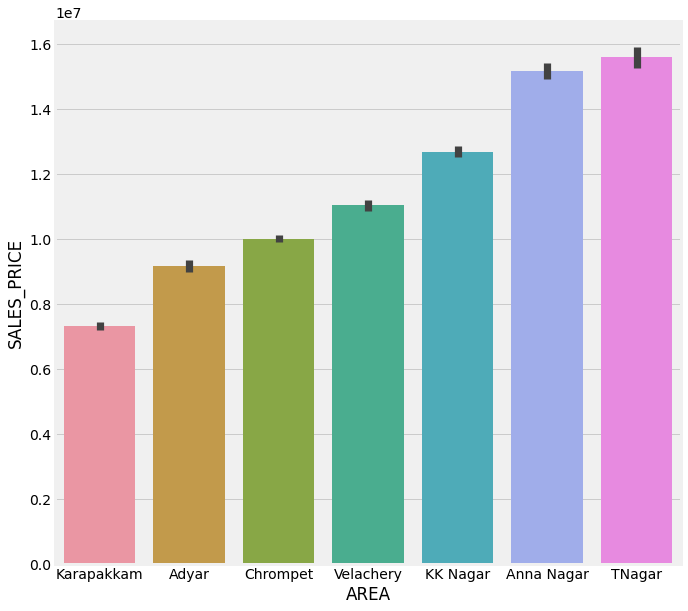

In [151]:
plt.figure(figsize=(10,10))
plt.style.use("fivethirtyeight")
sns.barplot(x=data_set.AREA,y=data_set.SALES_PRICE,order=area_range_order)

There is a linear relationship between Feature AREA and SALES PRICE.

OBSERVATION FOR BUYERS:

  1. If your budget is within 1 crore then you can choose area such as Karapakkam,Adayar and Chrompet.
  2. If your budget is more than 1 crore then you can choose area such as velachery,KK Nagar,Anna Nagar,T Nagar. but you need to take into other consideration as well.

OBSERVATION FOR SELLERS:(Include builders and Individual Sellers)

Builders or professional sellers:

1.If you are targetting for selling a house within a budget of 1Crore it is better to target area such as Karapakkam,Adayar and Chrompet.
2.If you are looking for a higher selling price ,you can targtet area such as velachery,KK Nagar,Anna Nagar,T Nagar

Individual Sellers

1. If you are looking to sell your house in area such as Karapakkam,Adayar and Chrompet on an average it fetches below 1 Crore 
2. If you are looking to sell your house in area such as velachery,KK Nagar,Anna Nagar,T Nagar on an average it fetches from 1-1.5 Crores sujected to other conditions. 


Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
TNagar         501
Name: AREA, dtype: int64

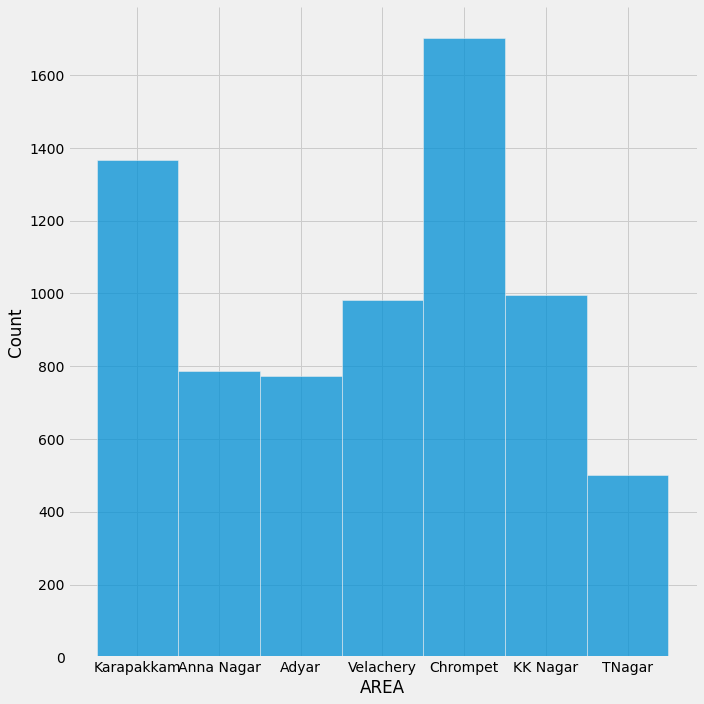

In [152]:
# Distribution of Feature AREA
sns.displot(data_set["AREA"],height=10)
data_set.AREA.value_counts()

OBSERVATION FOR BUYERS:
You can see that there are more houses sold in area such as Chrompet and Karapakkam( Less than 1 Crore). And Less number of house in T Nagar and Adayar(> 1 Crore). 

OBSERVATION FOR SELLERS:
Sellers can target area such as Chrompet and Karappakam as buyers are showing keen interest in these areas.



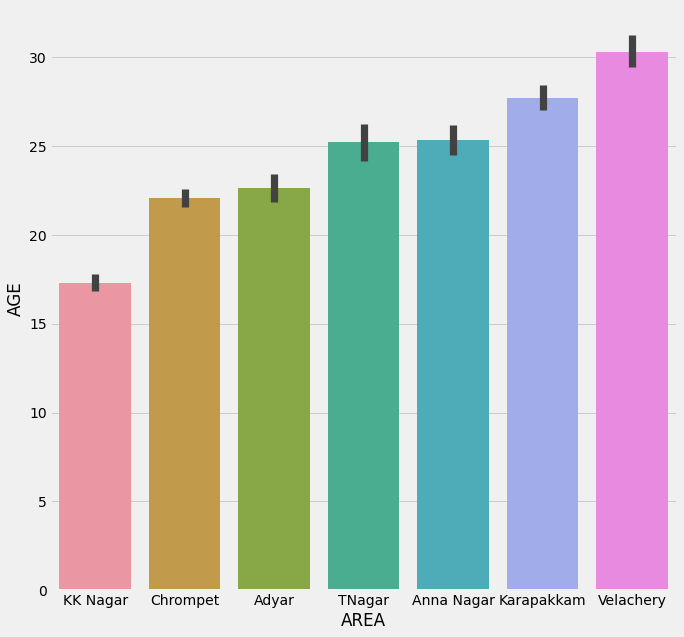

In [153]:
# AREA and AGE
plt.figure(figsize=(10,10))
order_age_area=data_set.groupby("AREA")["AGE"].mean().reset_index().sort_values('AGE')["AREA"]
sns.barplot(y=data_set.AGE,x=data_set.AREA,order=order_age_area)

OBSERVATION FOR BUYERS:
1. If you are planning to buy a house < 20 yrs you can look into area such as KK Nagar
2. If you are Looking to buy  houses  > 30 yrs look into area such as karapakkam and Velachery.

OBSERVATION FOR SELLLER:
BUILDERS:
1. Builders can see to buy old houses and rennovate in area such as annanagar,karapakkam and velachery and re-sell them


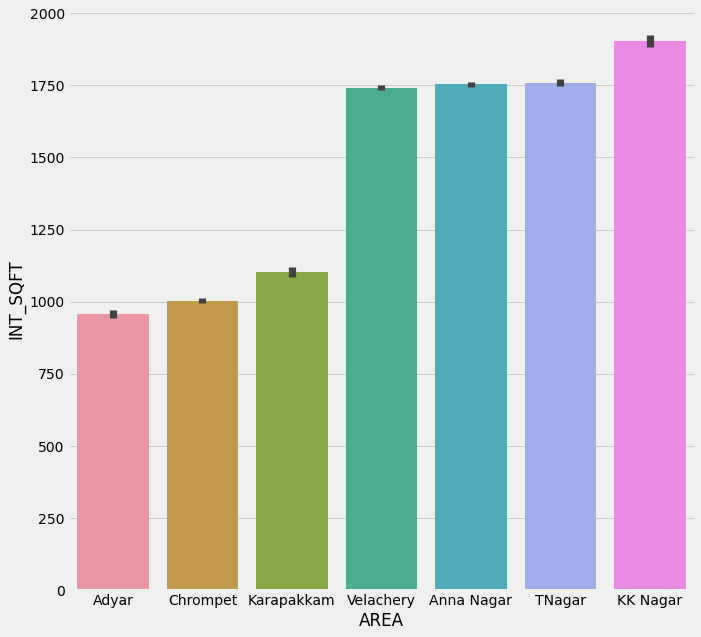

In [154]:
# AREA and INT_SQFT
plt.figure(figsize=(10,10))
order_intsqft_area=data_set.groupby("AREA")["INT_SQFT"].mean().reset_index().sort_values('INT_SQFT')["AREA"]
sns.barplot(x=data_set.AREA,y=data_set.INT_SQFT,order=order_intsqft_area)

OBSERVATION FOR BUYERS:
1. If they are looking for buying a house > 1000sqft they can look to area such as Tnagar and KK Nagar
2. If they are Looking for buying house < 1000 sqft can look to Adayar and Chrompet but are subjected to other conditions as well.

OBSERVATION for SELLERS:
1. Builders can target to build high spacious houses ain area such as TNagar ,KK Nagar , Velachery and Anna nagar as clear demand is seen 
2. And can go for building compact houses in  Adayar and Chrompet.

In [155]:
# AREA and N_BEDROOM
area_n_bed=pd.DataFrame(data_set.groupby("AREA")["N_BEDROOM"].value_counts())
area_n_bed=area_n_bed.rename(columns={"N_BEDROOM":"Total"})
area_n_bed=area_n_bed.reset_index()


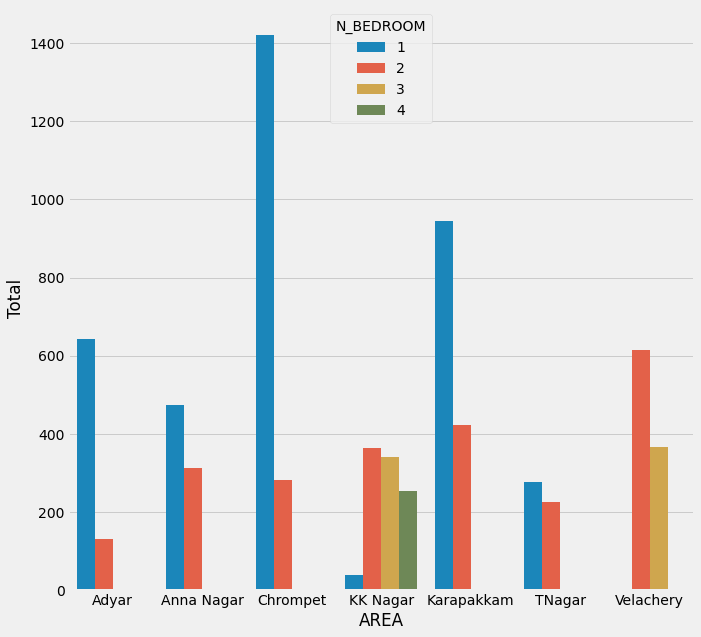

In [156]:
plt.figure(figsize=(10,10))
sns.barplot(x=area_n_bed.AREA,y=area_n_bed.Total,hue=area_n_bed.N_BEDROOM)

OBSERVATION FOR BUYERS:
1. If you are looking for 1 BHK you can avoid Velachery.
2. If you are looking for 3 BHK you an look for area such as KK Nagar and Velachery and for 4 BHK you can look for KK Nagar

OBSERVATION FOR SELLER:
1. If you want to sell compact houses 1BHK concentrate more on Chrompet and Karapakkam
2. If you want to sell all type of BHK you can look for KK Nagar and also for spacious houses that is 3+BHK you can sell in KK Nagar and velachery

In [157]:
# AREA and N_BATHROOM
area_n_bath=pd.DataFrame(data_set.groupby("AREA")["N_BATHROOM"].value_counts())
area_n_bath=area_n_bath.rename(columns={"N_BATHROOM":"Total"})
area_n_bath=area_n_bath.reset_index()


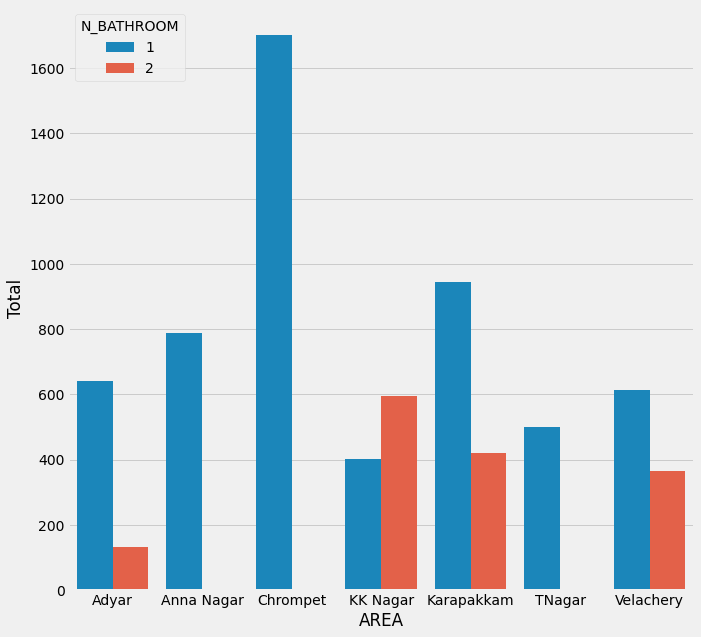

In [158]:
plt.figure(figsize=(10,10))
sns.barplot(x=area_n_bath.AREA,y=area_n_bath.Total,hue=area_n_bath.N_BATHROOM)

OBSERVATION FOR BUYERS:
1. If you want a house with 2 bath room. You can avoid area such as Chrompet, Annanagar, T Nagar

OBSERVATION FOR SELLERS:
1. Demand for 2 Bathroom houses in KK Nagar is more. Areas such as Karapakkam ,Velachery and Adayar have demand for 2 Bathroom.



In [159]:
# AREA and N_ROOM
area_n_room=pd.DataFrame(data_set.groupby("AREA")["N_ROOM"].value_counts())
area_n_room=area_n_room.rename(columns={"N_ROOM":"Total"})
area_n_room=area_n_room.reset_index()


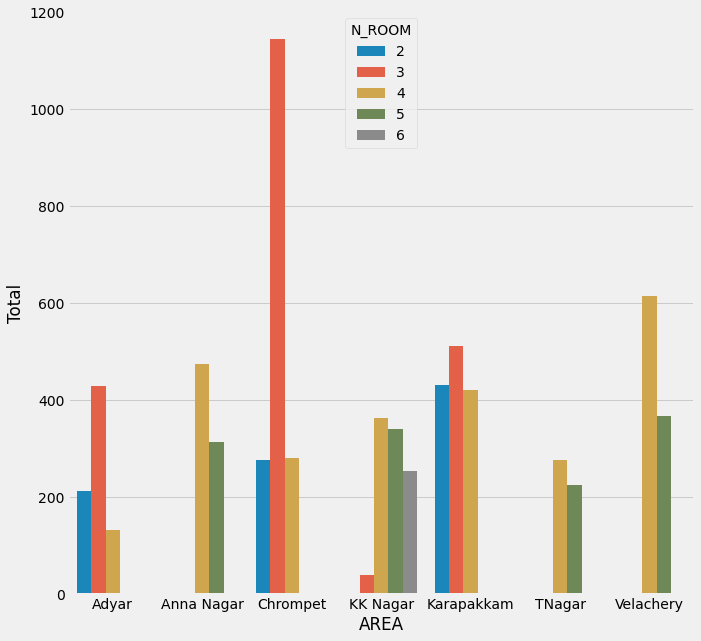

In [160]:
plt.figure(figsize=(10,10))
sns.barplot(x=area_n_room.AREA,y=area_n_room.Total,hue=area_n_room.N_ROOM)

OBSERVATION FOR BUYERS:
1. If you want a house with 4+ rooms look for area's such as Annanagar.TNagar,Velachery
2. Karapakkam, Chrompet and Adayar have 2 Room houses.

OBSERVATION FOR SELLERS:
1. Can target spacious houses in Annanagar, TNAGAR and Velacherry.
2. Can also target compact houses in Karapakkam, Chrompet and Adayar 


**BUILD TYPE**

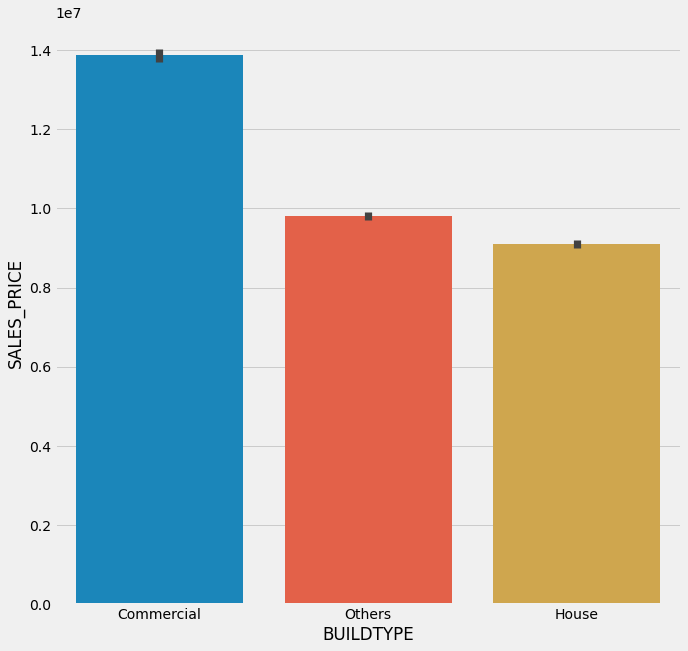

In [161]:
plt.figure(figsize=(10,10))
sns.barplot(x=data_set.BUILDTYPE,y=data_set.SALES_PRICE)

There is a Linear relationship between Build type and Salesprice
OBSERVATION FOR SELLER:
Seller can target Commercial properties than others to fetch great sales price. 


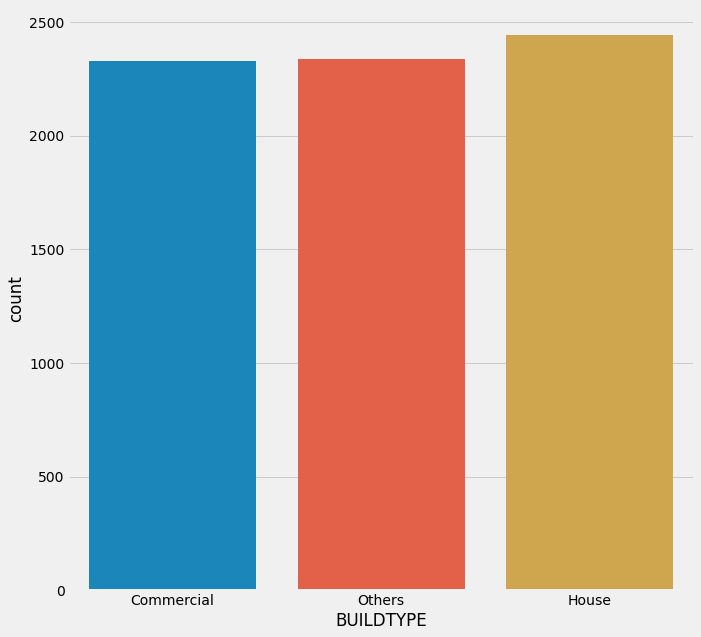

In [162]:
# Distribution of BUILD TYPE
plt.figure(figsize=(10,10))
sns.countplot(data_set.BUILDTYPE)

Observation is there are more houses than commercial properties.

In [163]:
# BUILD TYPE and AREA
area_n_buildtype=pd.DataFrame(data_set.groupby("AREA")["BUILDTYPE"].value_counts())
area_n_buildtype=area_n_buildtype.rename(columns={"BUILDTYPE":"Total"})
area_n_buildtype=area_n_buildtype.reset_index()

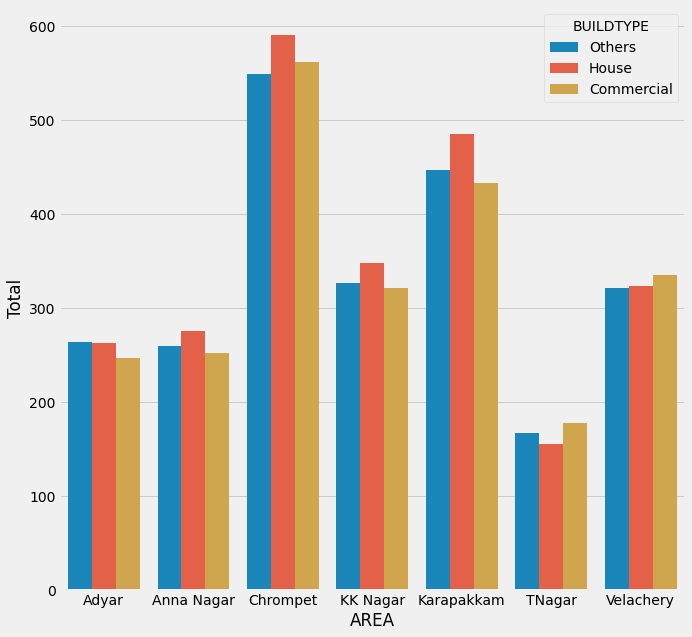

In [164]:
plt.figure(figsize=(10,10))
sns.barplot(x=area_n_buildtype.AREA,y=area_n_buildtype.Total,hue=area_n_buildtype.BUILDTYPE)

OBSERVATION FOR BUYERS:
1. If planning to buy commercial properties there are more in Chrompet, Karapakkam and KK nagar

OBSERVATION for SELLERS:
There are more commercial properties than houses in velachery and TNagar, you can better build commercial property than a house. 

In [165]:
# BUILD TYPE and N_ROOM
buildtype_nroom=pd.DataFrame(data_set.groupby("BUILDTYPE")["N_ROOM"].value_counts())
buildtype_nroom=buildtype_nroom.rename(columns={"N_ROOM":"Total"})
buildtype_nroom=buildtype_nroom.reset_index()

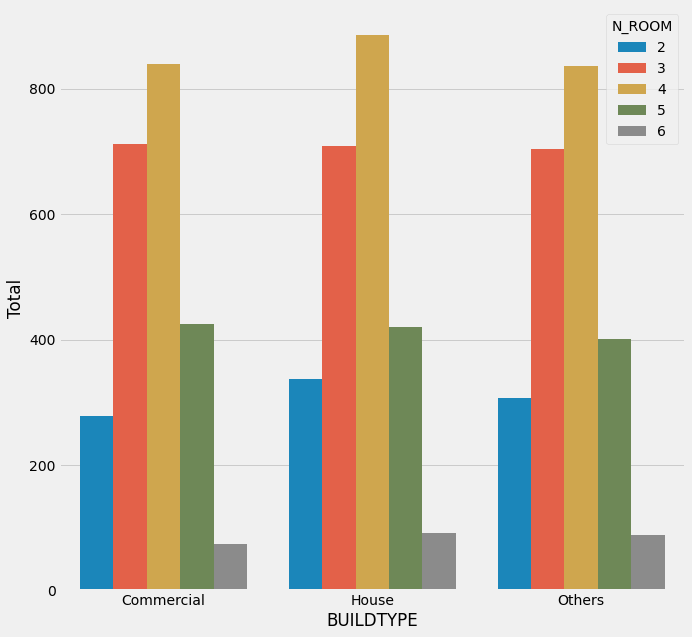

In [166]:
plt.figure(figsize=(10,10))
sns.barplot(x=buildtype_nroom.BUILDTYPE,y=buildtype_nroom.Total,hue=buildtype_nroom.N_ROOM)

The distribution of N_ROOM is similar across BUILD TYPE.

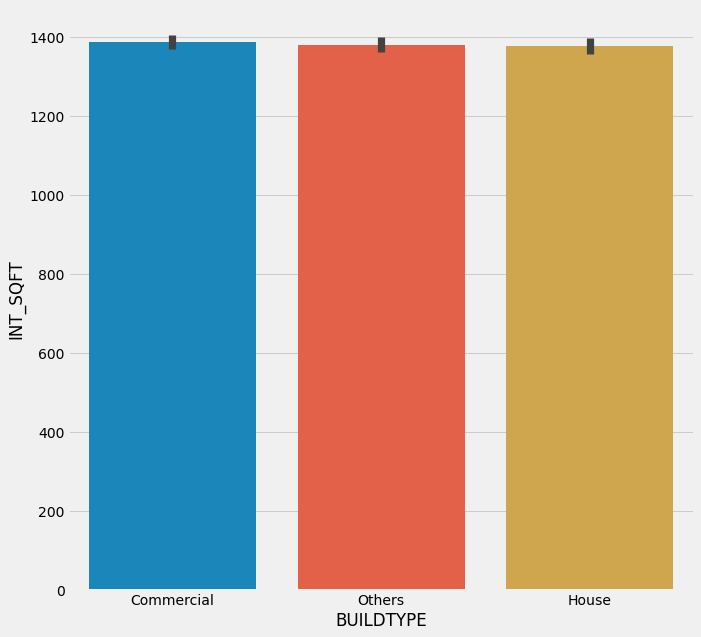

In [167]:
# BUILD_TYPE and INT_SQFT
plt.figure(figsize=(10,10))
sns.barplot(x=data_set.BUILDTYPE,y=data_set.INT_SQFT)

BUILD_TYPE and INT_SQFT are uniformly distributed. Nothing significant.

In [168]:
# BUILD TYPE AND PARK_FACIL
buildtype_park=pd.DataFrame(data_set.groupby("BUILDTYPE")["PARK_FACIL"].value_counts())
buildtype_park=buildtype_park.rename(columns={"PARK_FACIL":"Total"})
buildtype_park=buildtype_park.reset_index()

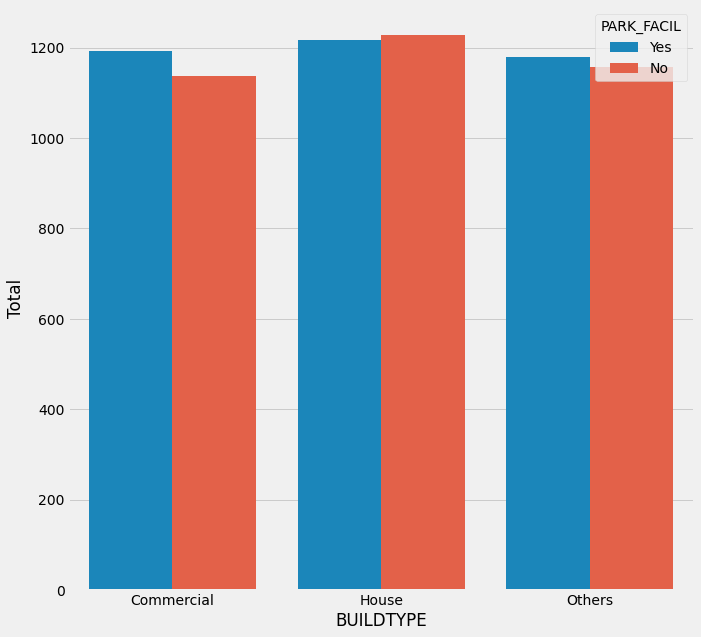

In [169]:
plt.figure(figsize=(10,10))
sns.barplot(x=buildtype_park.BUILDTYPE,y=buildtype_park.Total,hue=buildtype_park.PARK_FACIL)

You can see that there are more no parking facility houses than houses with parking facility. While in Commercial and Others there are more parking facilities that without parking facility.

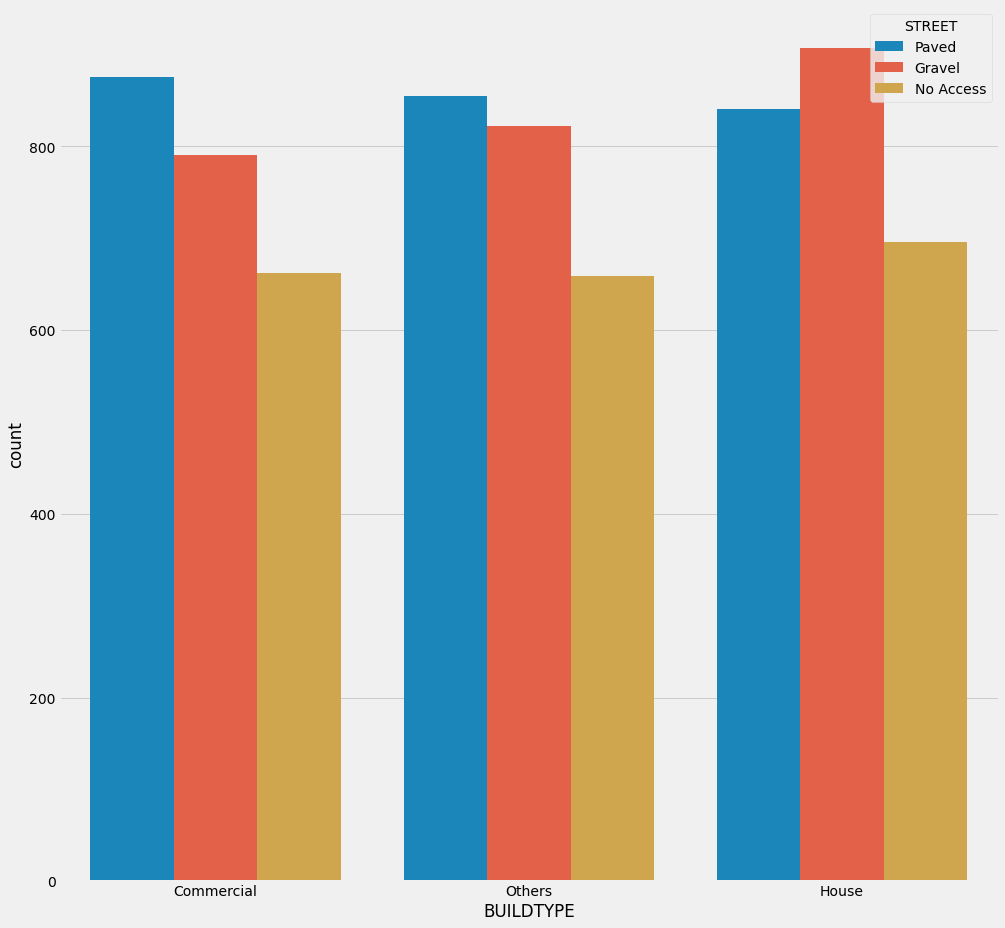

In [170]:
# BUILD_TYPE and STREET
plt.figure(figsize=(15,15))
sns.countplot(data_set.BUILDTYPE,hue=data_set.STREET)

Commercial Properties have high paved street, other type have high paved street 
and House have more Gravel streets

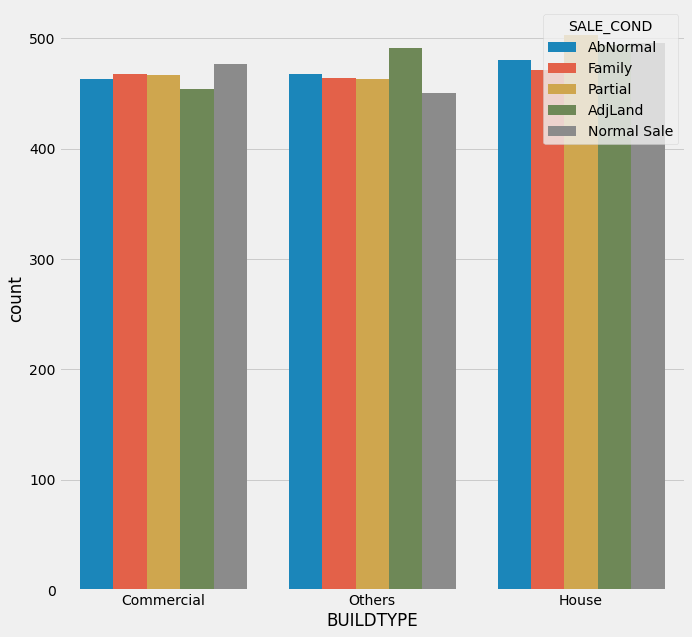

In [171]:
# BUILD_TYPE and SALE_COND
plt.figure(figsize=(10,10))
sns.countplot(data_set.BUILDTYPE,hue=data_set.SALE_COND)

Commercial Properties have more normal Sale. Other properties have more partial type. Housing properties have more Adj land .

In [172]:
# BUILD_TYPE and N_BEDROOM
buildtype_nbed=pd.DataFrame(data_set.groupby("BUILDTYPE")["N_BEDROOM"].value_counts())
buildtype_nbed=buildtype_nbed.rename(columns={"N_BEDROOM":"Total"})
buildtype_nbed=buildtype_nbed.reset_index()

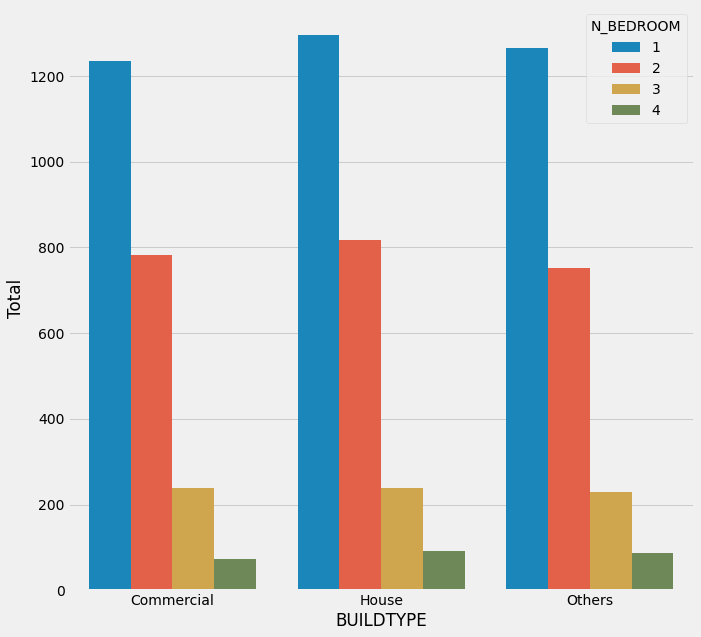

In [173]:
plt.figure(figsize=(10,10))
sns.barplot(x=buildtype_nbed.BUILDTYPE,y=buildtype_nbed.Total,hue=buildtype_nbed.N_BEDROOM)

Distribution across BUILD TYPE is same nothing special.

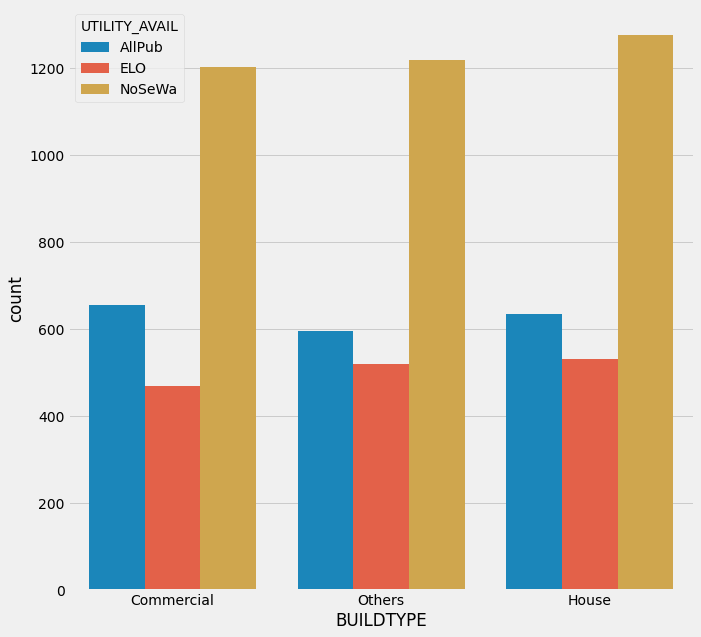

In [174]:
# BUILD_TYPE and UTILITY_AVAIL
plt.figure(figsize=(10,10))
sns.countplot(data_set.BUILDTYPE,hue=data_set.UTILITY_AVAIL)

Across all BUILD TYPE , NOSEwa is more in all categories and ELO is less.

**PARK_FACIL**

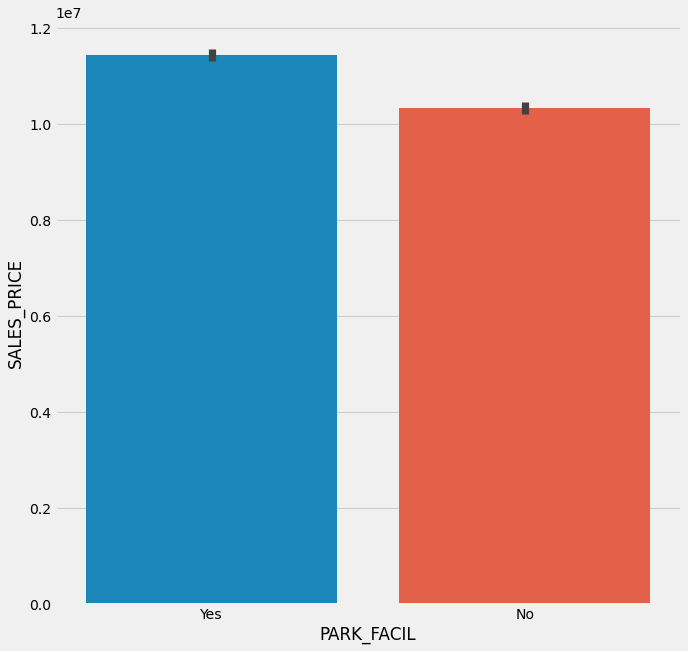

In [175]:
# PARK_FACIL and SALES_PRICE
plt.figure(figsize=(10,10))
sns.barplot(x=data_set["PARK_FACIL"],y=data_set["SALES_PRICE"])

There is a linear relationship between PARK_FACIL and SALES_PRICE. 
Sellers should focus to sell properties which have parking facility to fetch more money. 

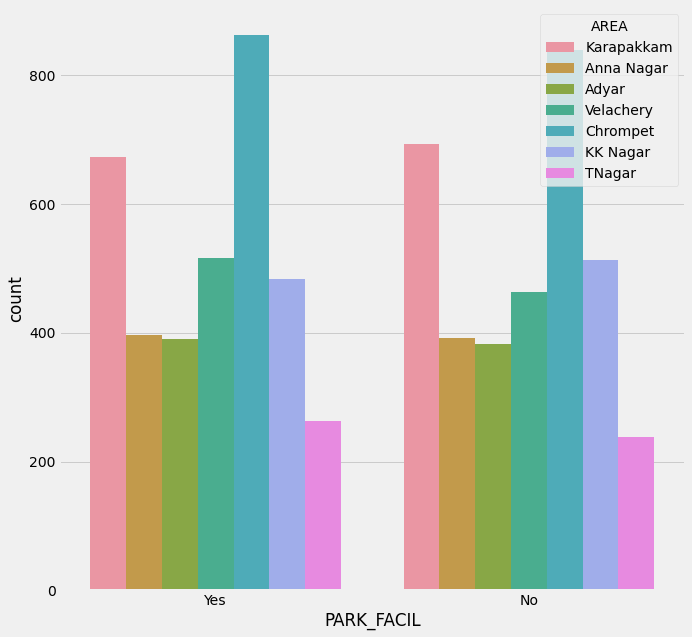

In [176]:
# PARK_FACIL and AREA
plt.figure(figsize=(10,10))
sns.countplot(data_set.PARK_FACIL,hue=data_set.AREA)

KK Nagar is the only area where houses with no parking facility is more than parking facility.

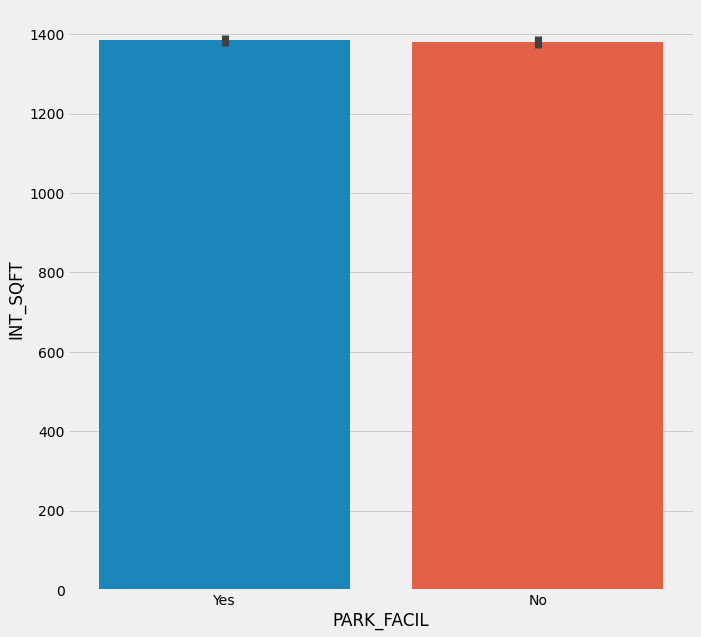

In [177]:
# PARK_FACIL and INT_SQFT
plt.figure(figsize=(10,10))
sns.barplot(x=data_set.PARK_FACIL,y=data_set.INT_SQFT)

There is no big change in INt_SQFT. so this is of no use.

In [178]:
# PARK_FACIL and N_ROOM
park_nroom=pd.DataFrame(data_set.groupby("PARK_FACIL")["N_ROOM"].value_counts())
park_nroom=park_nroom.rename(columns={"N_ROOM":"Total"})
park_nroom=park_nroom.reset_index()

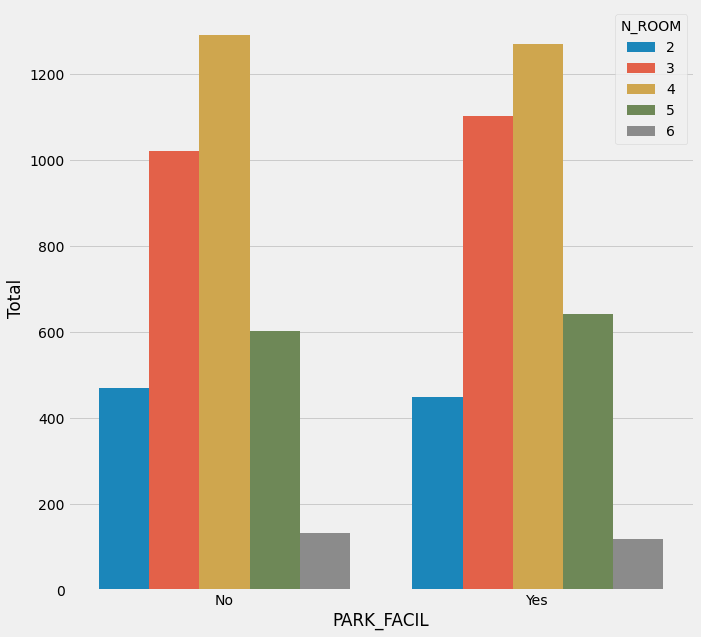

In [179]:
plt.figure(figsize=(10,10))
sns.barplot(x=park_nroom.PARK_FACIL,y=park_nroom.Total,hue=park_nroom.N_ROOM)

The distribution is pretty much uniform.



In [180]:
# PARK_FACIL and N_BEDROOM
park_nbroom=pd.DataFrame(data_set.groupby("PARK_FACIL")["N_BEDROOM"].value_counts())
park_nbroom=park_nbroom.rename(columns={"N_BEDROOM":"Total"})
park_nbroom=park_nbroom.reset_index()

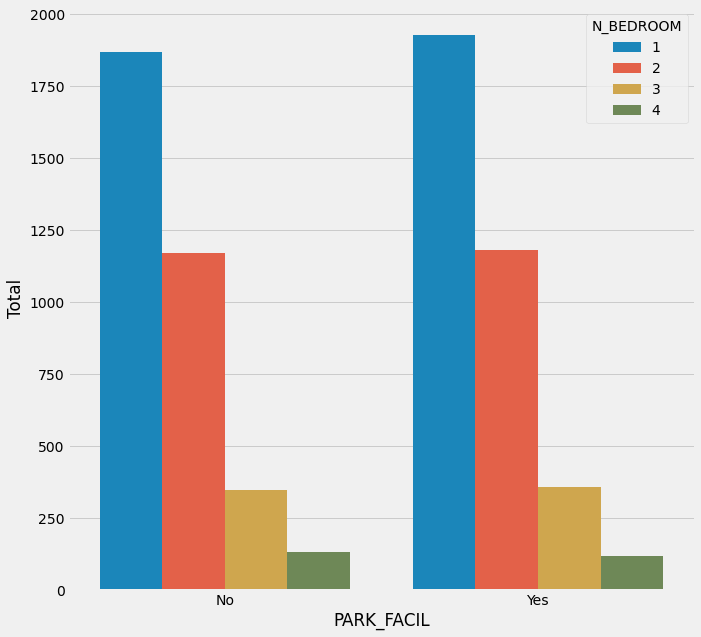

In [181]:
plt.figure(figsize=(10,10))
sns.barplot(x=park_nbroom.PARK_FACIL,y=park_nbroom.Total,hue=park_nbroom.N_BEDROOM)

The distribution is pretty much uniform. 



**SALES CONDITION**

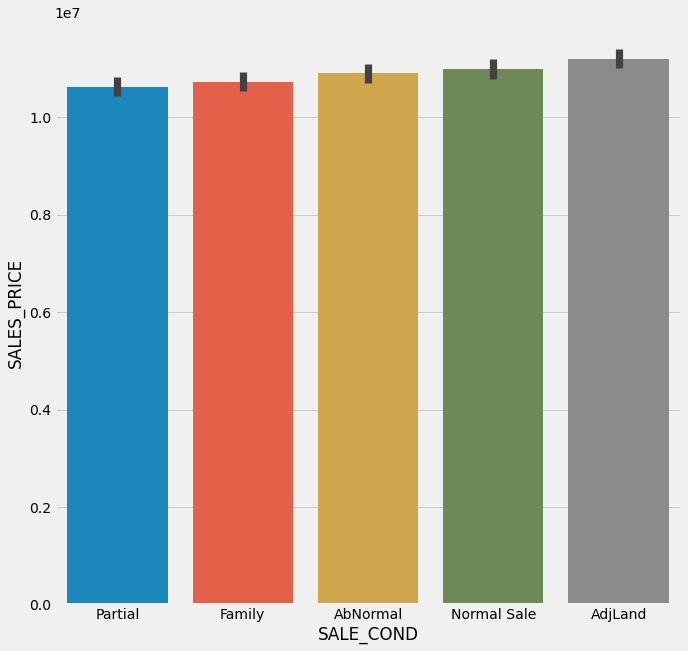

In [182]:
# SALE_COND vs SALES_PRICE
salescon_order=data_set.groupby("SALE_COND")["SALES_PRICE"].mean().reset_index().sort_values('SALES_PRICE')["SALE_COND"]
plt.figure(figsize=(10,10))
sns.barplot(x=data_set.SALE_COND,y=data_set.SALES_PRICE,order=salescon_order)

SALE_COND has a linear relationship with SALES_PRICE but the relationship is not that much significant.
So the Feature SALE_COND is not selected but still lets explore others for any observations.

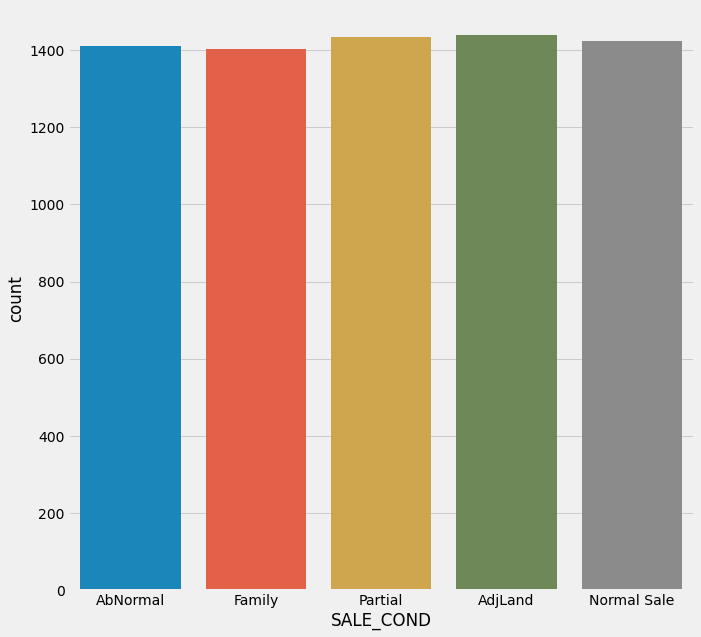

In [183]:
# Distribution of SALE_COND
plt.figure(figsize=(10,10))
sns.countplot(data_set.SALE_COND)

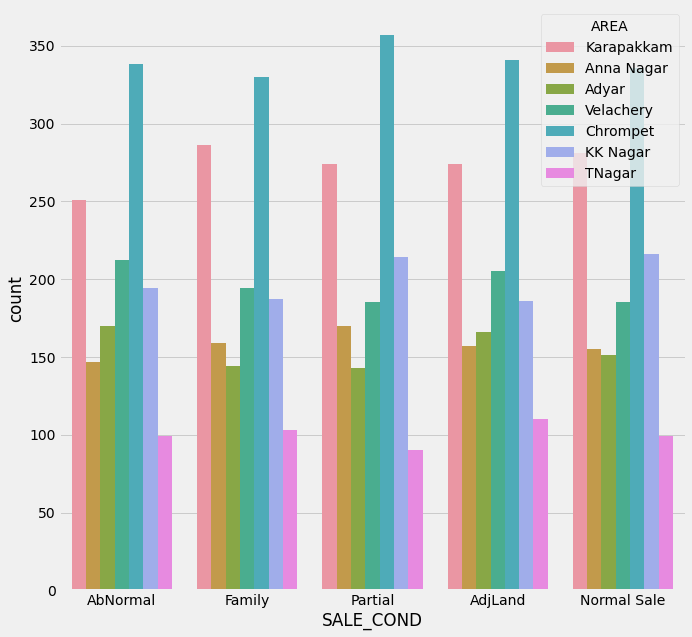

In [184]:
# SALE_COND VS AREA
plt.figure(figsize=(10,10))
sns.countplot(data_set.SALE_COND,hue=data_set.AREA)

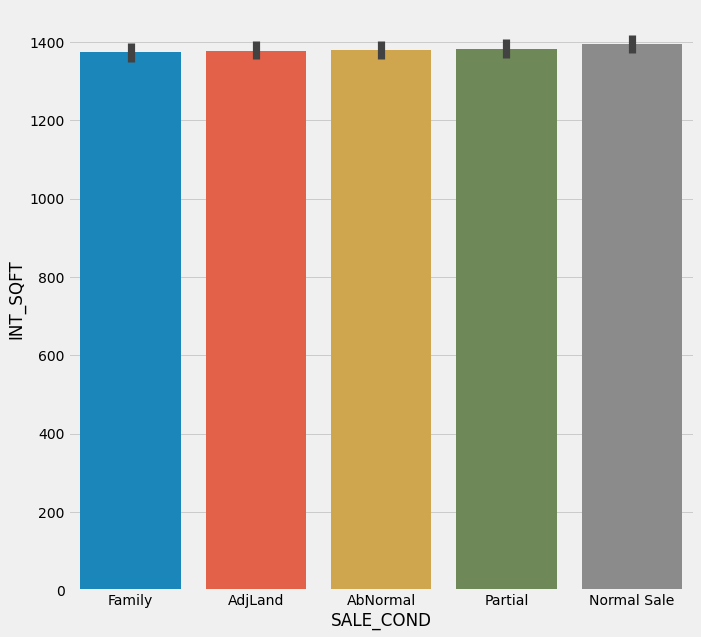

In [185]:
# SALE_COND and INT_SQFT
salescon_sqft=data_set.groupby("SALE_COND")["INT_SQFT"].mean().reset_index().sort_values('INT_SQFT')["SALE_COND"]
plt.figure(figsize=(10,10))
sns.barplot(x=data_set.SALE_COND,y=data_set.INT_SQFT,order=salescon_sqft)


Nearly uniform distribution.Possible combinations have been observed and nothing gives a good insite, so this feature is totally rejected.

**UTILITY_AVAILABLE**

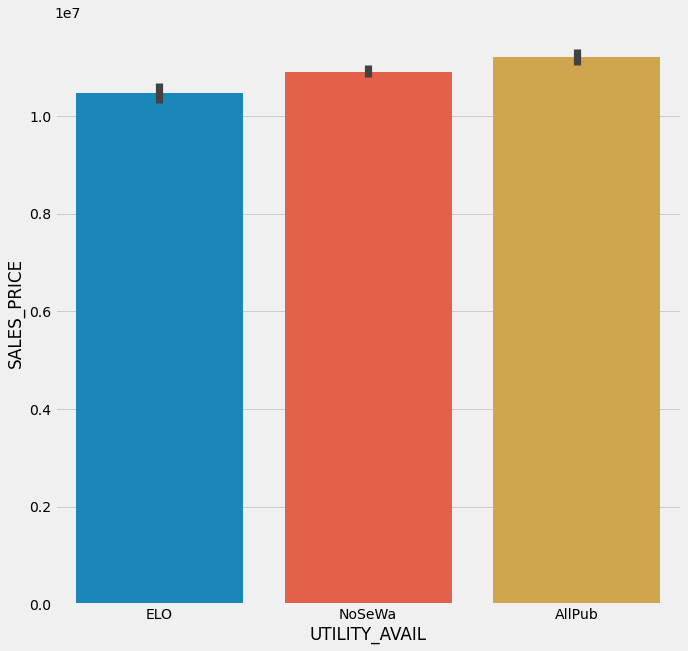

In [186]:
# UTILITY_AVAIL and SALES_PRICE
util_order=data_set.groupby("UTILITY_AVAIL")["SALES_PRICE"].mean().reset_index().sort_values('SALES_PRICE')["UTILITY_AVAIL"]
plt.figure(figsize=(10,10))
sns.barplot(x=data_set.UTILITY_AVAIL,y=data_set.SALES_PRICE,order=util_order)

There is a linear relationship between UTILITY_AVAIL and SALES_PRICE, So Feature UTILITY_AVAIL is selected.

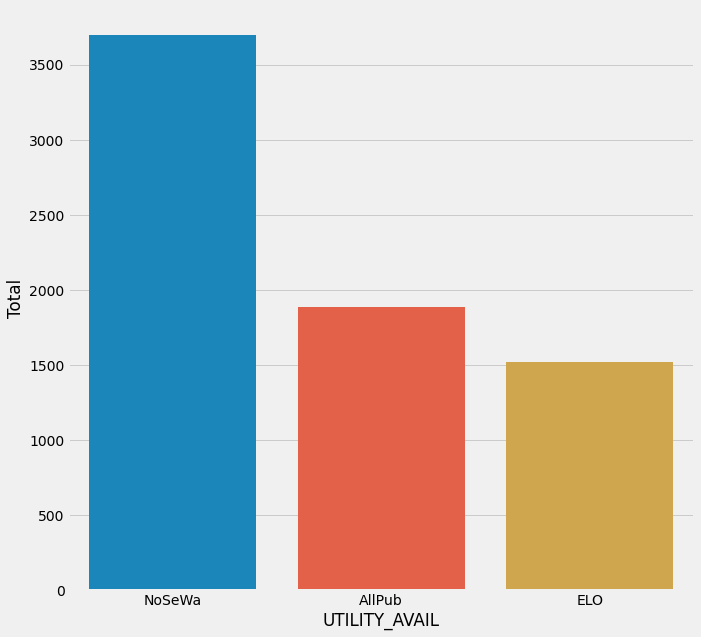

In [187]:
# UTILITY_AVAIL distribution 
util=pd.DataFrame(data_set.UTILITY_AVAIL.value_counts()).reset_index()
util=util.rename(columns={"UTILITY_AVAIL":"Total","index":"UTILITY_AVAIL"})
plt.figure(figsize=(10,10))
sns.barplot(x=util.UTILITY_AVAIL,y=util.Total)

We can see that there are more properties with NoSewa followed by ALLPub and ELO

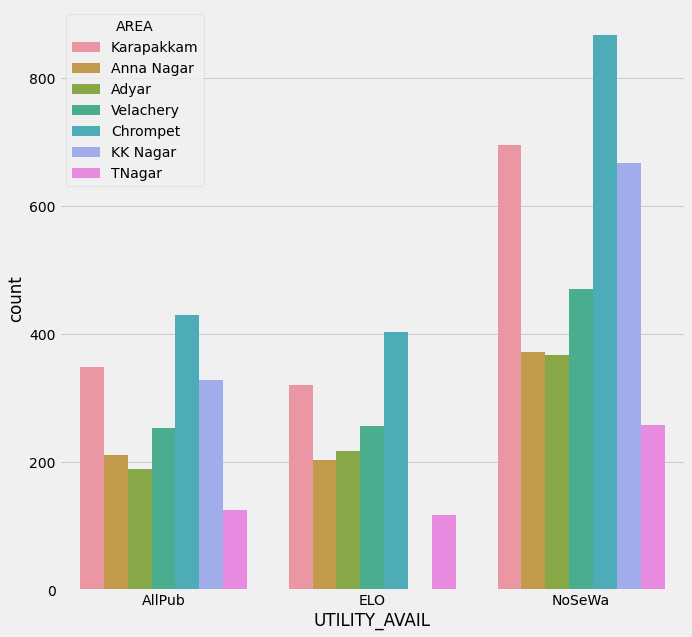

In [188]:
# UTILITY_AVAIL  vs AREA
plt.figure(figsize=(10,10))
sns.countplot(data_set.UTILITY_AVAIL,hue=data_set.AREA)

In all of ULTILITY_AVAIL Chrompet has the highest count and ELO category there is no property in ELO.

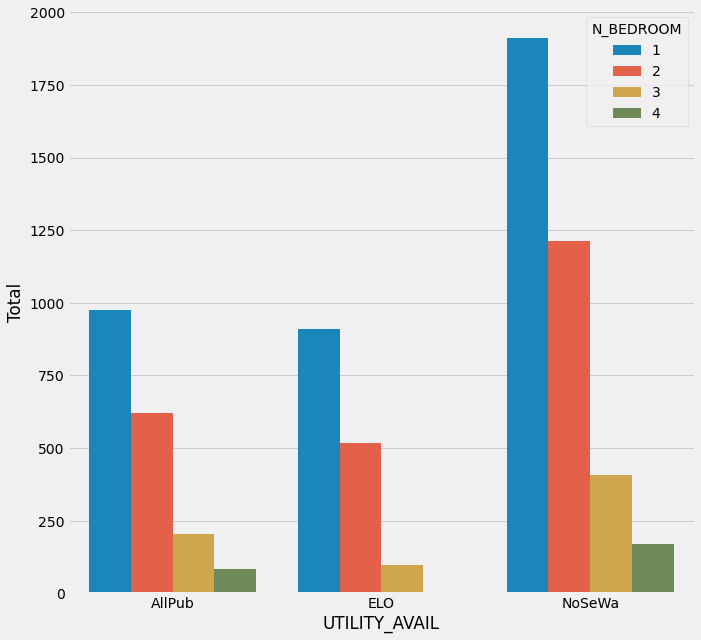

In [189]:
# ULTILITY_AVAIL AND N_BEDROOM
utility_nbed=pd.DataFrame(data_set.groupby("UTILITY_AVAIL")["N_BEDROOM"].value_counts())
utility_nbed=utility_nbed.rename(columns={"N_BEDROOM":"Total"})
utility_nbed=utility_nbed.reset_index()
plt.figure(figsize=(10,10))
sns.barplot(x=utility_nbed.UTILITY_AVAIL,y=utility_nbed.Total,hue=utility_nbed.N_BEDROOM)

Across category N_BEDROOM=1 has the most number of count.And in category ELO there are no 4 BEDROOM's

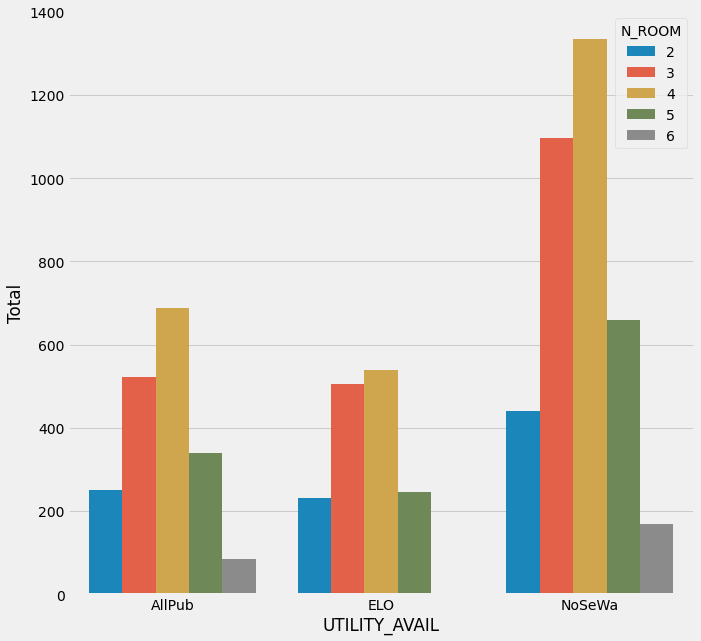

In [190]:
# ULTILITY_AVAIL AND N_ROOM
utility_nroom=pd.DataFrame(data_set.groupby("UTILITY_AVAIL")["N_ROOM"].value_counts())
utility_nroom=utility_nroom.rename(columns={"N_ROOM":"Total"})
utility_nroom=utility_nroom.reset_index()
plt.figure(figsize=(10,10))
sns.barplot(x=utility_nroom.UTILITY_AVAIL,y=utility_nroom.Total,hue=utility_nroom.N_ROOM)

There are no 6 room property inn ELO category. Across category NROOM=4 has the most number of count.

**MZZONE**

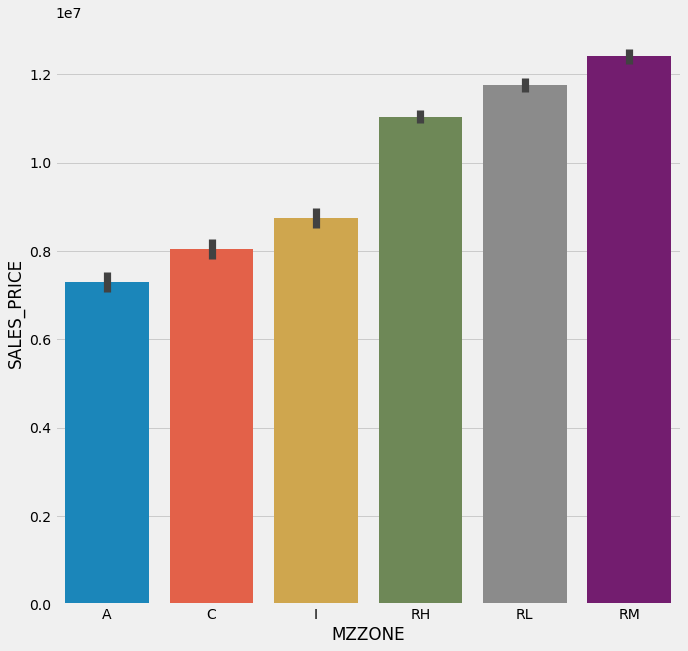

In [191]:
mzzone_order=data_set.groupby("MZZONE")["SALES_PRICE"].mean().reset_index().sort_values('SALES_PRICE')["MZZONE"]
plt.figure(figsize=(10,10))
sns.barplot(x=data_set.MZZONE,y=data_set.SALES_PRICE,order=mzzone_order)


There is a Linear Relationship MZZONE and SALES_PRICE.

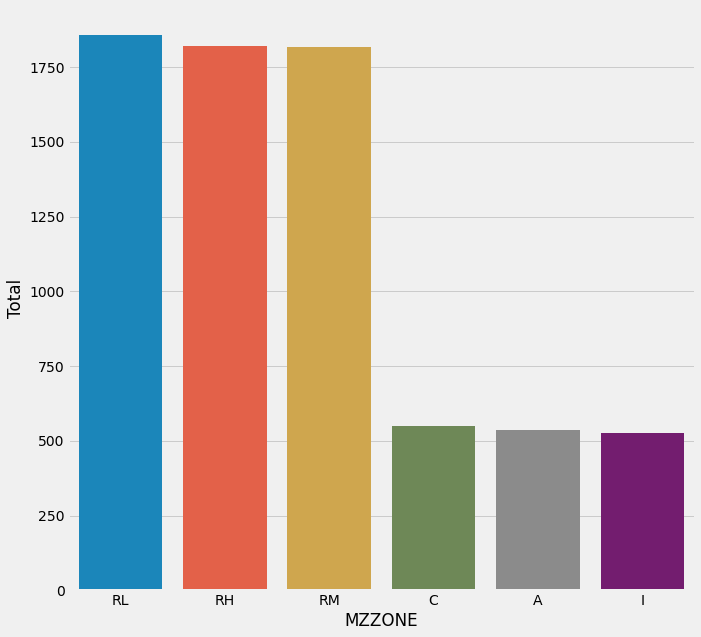

In [192]:
# MZZONE Distribution
mzzone=pd.DataFrame(data_set.MZZONE.value_counts()).reset_index()
mzzone=mzzone.rename(columns={"MZZONE":"Total","index":"MZZONE"})
plt.figure(figsize=(10,10))
sns.barplot(x=mzzone.MZZONE,y=mzzone.Total)

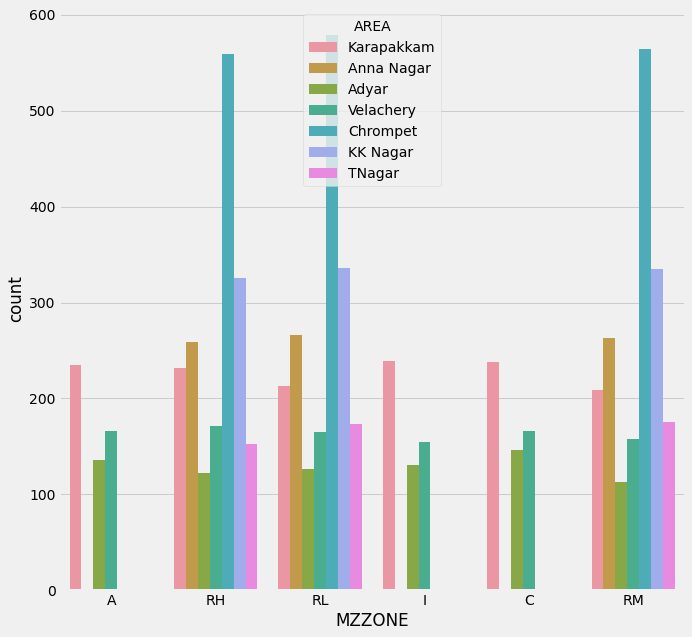

In [193]:
# MZZONE and AREA
plt.figure(figsize=(10,10))
sns.countplot(data_set.MZZONE,hue=data_set.AREA)

There is no A MZZONE in Annanagar,Chrompet,KK Nagar,T Nagar.
There is no I MZZONE in Annanagar,Chrompet,KK Nagar,T Nagar.
There is no C MZZONE in Annanagar,Chrompet,KK Nagar,T Nagar

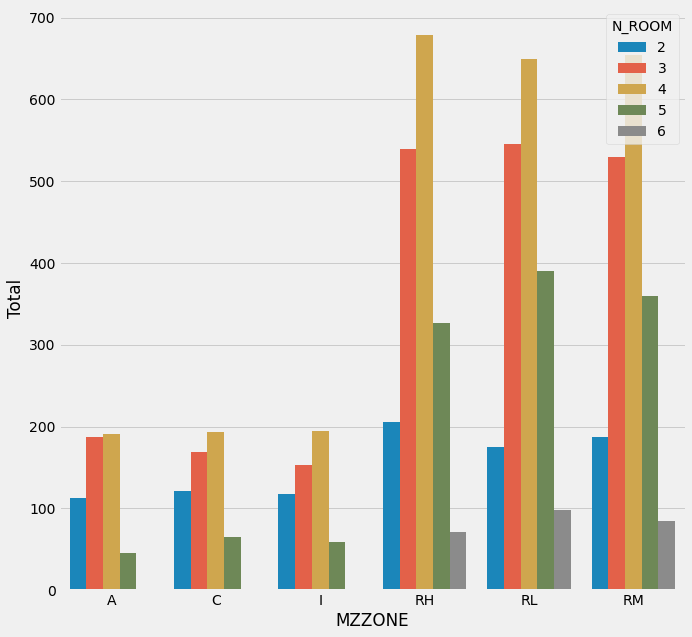

In [194]:
# MZZONE AND N_ROOM
mzzone_nroom=pd.DataFrame(data_set.groupby("MZZONE")["N_ROOM"].value_counts())
mzzone_nroom=mzzone_nroom.rename(columns={"N_ROOM":"Total"})
mzzone_nroom=mzzone_nroom.reset_index()
plt.figure(figsize=(10,10))
sns.barplot(x=mzzone_nroom.MZZONE,y=mzzone_nroom.Total,hue=mzzone_nroom.N_ROOM)

There is no 6 Rooms in A,C,I MZZONE.

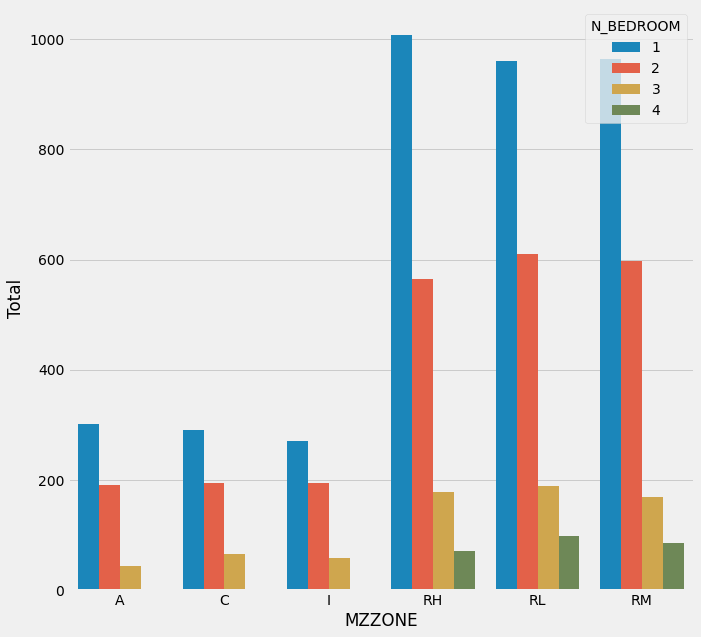

In [195]:
# MZZONE AND N_BEDROOM
mzzone_nbed=pd.DataFrame(data_set.groupby("MZZONE")["N_BEDROOM"].value_counts())
mzzone_nbed=mzzone_nbed.rename(columns={"N_BEDROOM":"Total"})
mzzone_nbed=mzzone_nbed.reset_index()
plt.figure(figsize=(10,10))
sns.barplot(x=mzzone_nbed.MZZONE,y=mzzone_nbed.Total,hue=mzzone_nbed.N_BEDROOM)

There is no 4 Bedroom in A,C,I MZZONE.

**N_ROOM**

<Figure size 720x720 with 0 Axes>

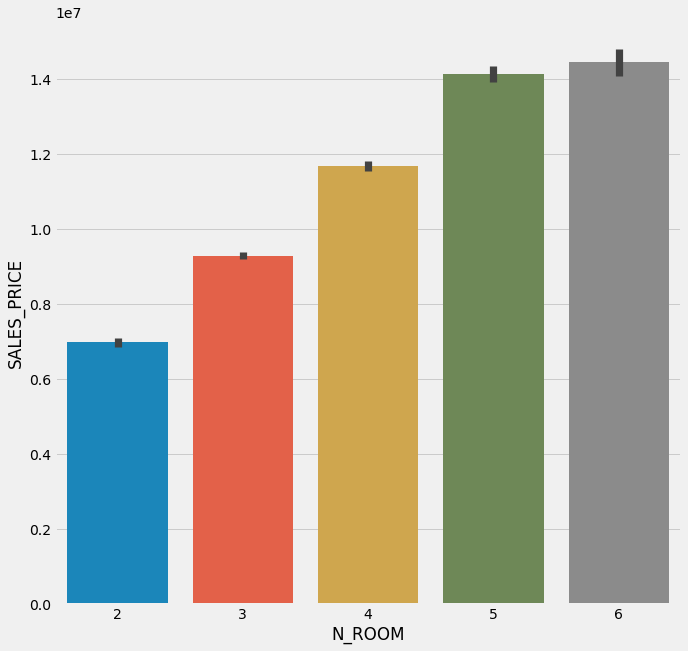

In [196]:
# N_ROOM and SALES_PRICE
plt.figure(figsize=(10,10))
nroom_order=data_set.groupby("N_ROOM")["SALES_PRICE"].mean().reset_index().sort_values('SALES_PRICE')["N_ROOM"]
plt.figure(figsize=(10,10))
sns.barplot(x=data_set.N_ROOM,y=data_set.SALES_PRICE,order=nroom_order)


There is linear relationship between N_ROOM and SALES_PRICE. So the feature is selected.

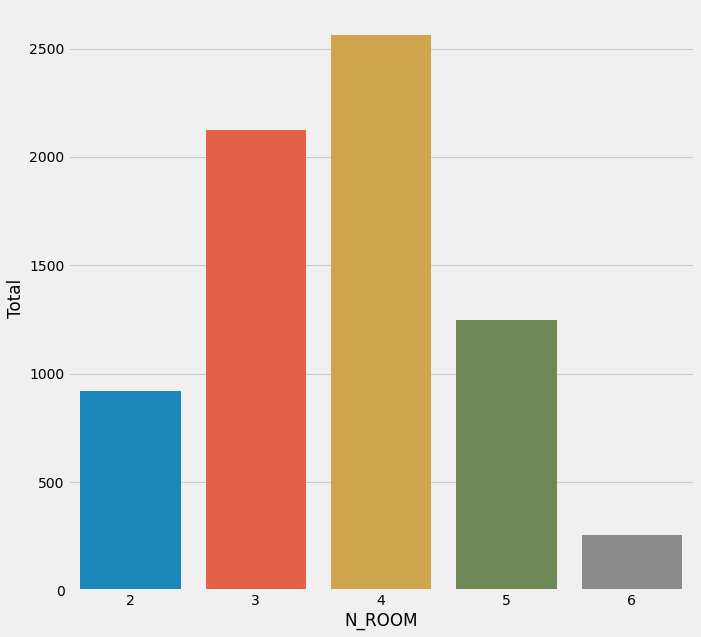

In [197]:
# N_ROOM Distribution
nroom=pd.DataFrame(data_set.N_ROOM.value_counts()).reset_index()
nroom=nroom.rename(columns={"N_ROOM":"Total","index":"N_ROOM"})
plt.figure(figsize=(10,10))
sns.barplot(x=nroom.N_ROOM,y=nroom.Total)

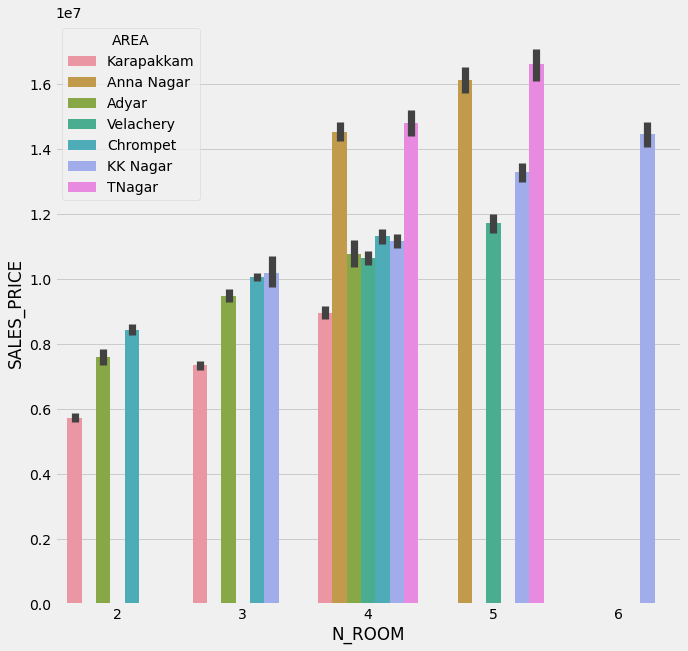

In [198]:
# N_ROOM,AREA,SALES_PRICE
plt.figure(figsize=(10,10))
sns.barplot(x=data_set["N_ROOM"],y=data_set["SALES_PRICE"],hue=data_set["AREA"])

OBSERVATION for BUYERS:
1. Buyers looking till 4 room can look for Karapakkam area as it is less from 2-4 NROOM.
2. 3 Rooms in Karapakkam is cheaper that 2 rooms property in adayar and velachery. Same,4 Rooms in Karapakkam is cheaper that 3 rooms property in adayar and velachery
3.5 Rooms in vealchery and KK Nagar is cheaper that 4 rooms property in Annanagar and T Nagar.
4.For 6 Room buyer can look for KKNagar

OBSERVATION for SELLERS:
Builders can look for selling spacious property with 5+ room in area such as velachery,Annanagar,KK Nagar,T Nagar

**N_BEDROOM**

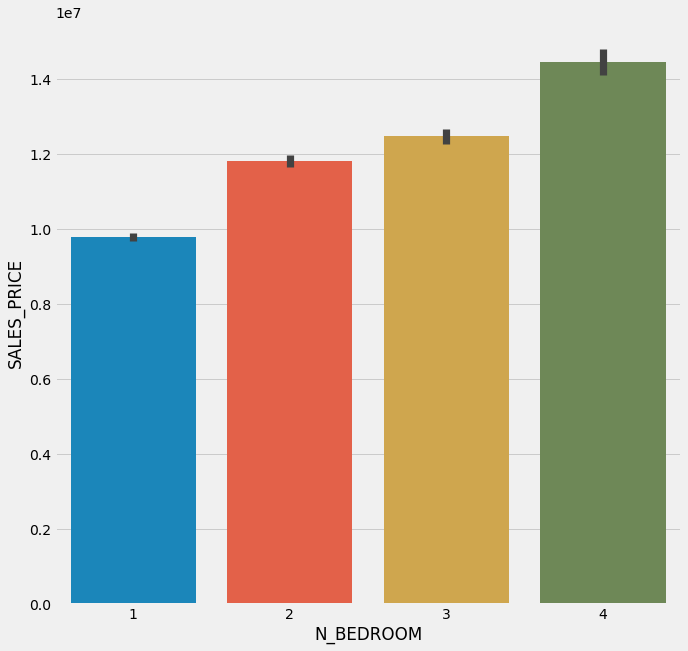

In [199]:
# N_BEDROOM and SALES_PRICE
plt.figure(figsize=(10,10))
nbed_order=data_set.groupby("N_BEDROOM")["SALES_PRICE"].mean().reset_index().sort_values('SALES_PRICE')["N_BEDROOM"]
sns.barplot(x=data_set.N_BEDROOM,y=data_set.SALES_PRICE,order=nbed_order)

There is linear relationship between N_BEDROOM and SALES_PRICE. So the feature N_BEDROOM is chosen.

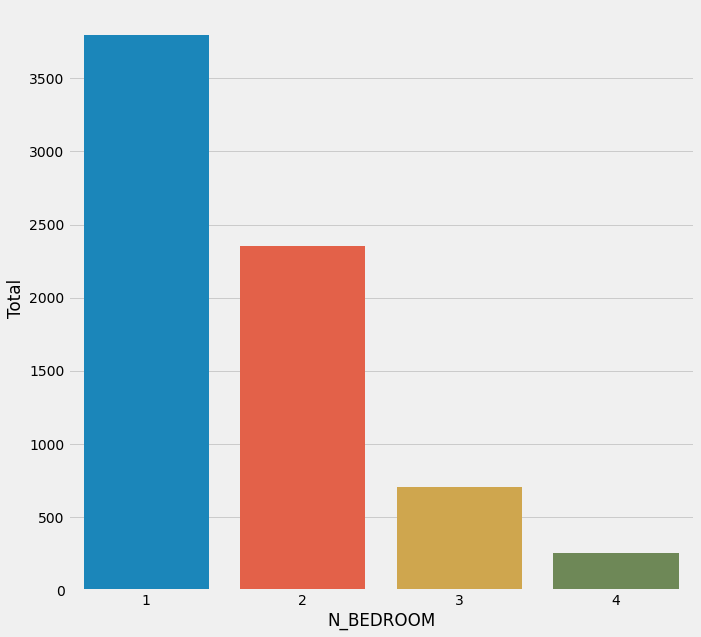

In [200]:
# N_BEDROOM Distribution
nbed=pd.DataFrame(data_set.N_BEDROOM.value_counts()).reset_index()
nbed=nbed.rename(columns={"N_BEDROOM":"Total","index":"N_BEDROOM"})
plt.figure(figsize=(10,10))
sns.barplot(x=nbed.N_BEDROOM,y=nbed.Total)

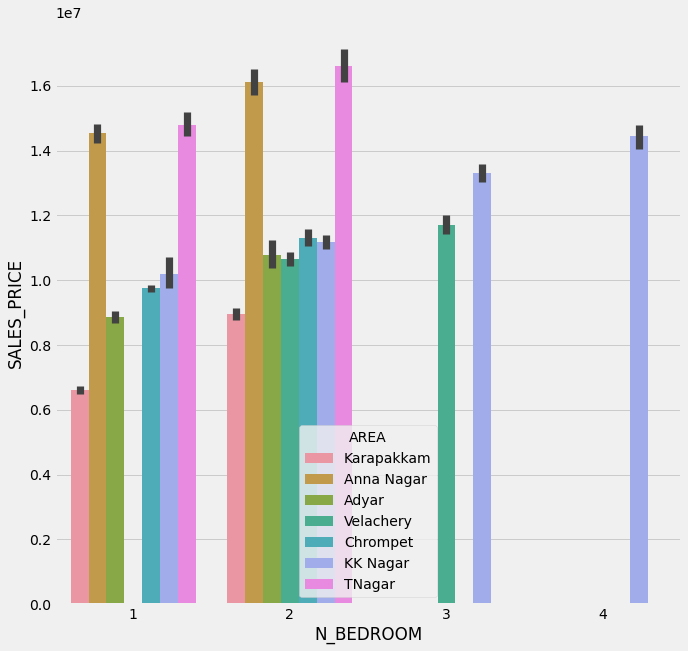

In [201]:
# N_BEDROOM,AREA,SALES_PRICE
plt.figure(figsize=(10,10))
sns.barplot(x=data_set["N_BEDROOM"],y=data_set["SALES_PRICE"],hue=data_set["AREA"])

OBSERVATION for BUYERS:
1. 1 and 2 Room in karapakkam is the cheapest. 
2. 1 BHK in Annanagar and TNagar are costlier that 2BHK in karapakkam,adayar,velachery,kknagar and chrompet as well as 3BHK in velachery and KK Nagar and 4BHK in KK Nagar 
3. 3+ BHK people can look for Velachery and KK Nagar.

OBSERVATION FOR SELLER:
Even though 1 BHK iin annanagar and T Nagar are costlier there is a good demand for them. So individual seller can get a big return from their property.
Builders can focus on area such as karapakkam,chrompet and velachery.

**N_BATHROOM**

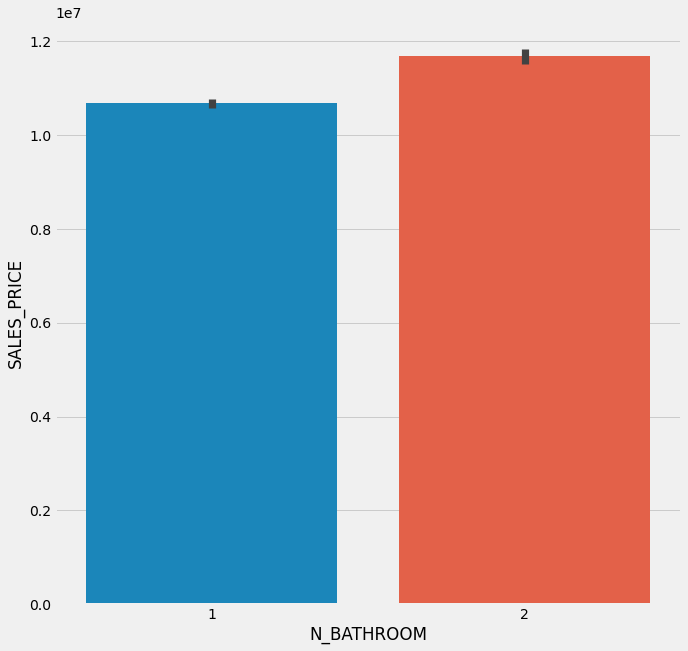

In [202]:
# N_BATHROOM and SALES_PRICE
plt.figure(figsize=(10,10))
nbath_order=data_set.groupby("N_BATHROOM")["SALES_PRICE"].mean().reset_index().sort_values('SALES_PRICE')["N_BATHROOM"]
sns.barplot(x=data_set.N_BATHROOM,y=data_set.SALES_PRICE,order=nbath_order)

There is linear relationship between N_BATHROOM and Sales_Price. So the feature is selected.

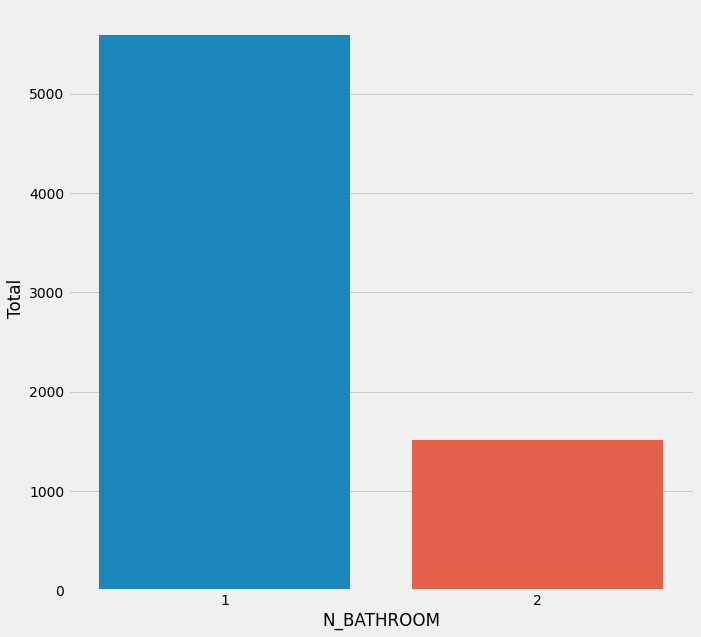

In [203]:
# N_BATHROOM Distribution
nbath=pd.DataFrame(data_set.N_BATHROOM.value_counts()).reset_index()
nbath=nbath.rename(columns={"N_BATHROOM":"Total","index":"N_BATHROOM"})
plt.figure(figsize=(10,10))
sns.barplot(x=nbath.N_BATHROOM,y=nbath.Total)

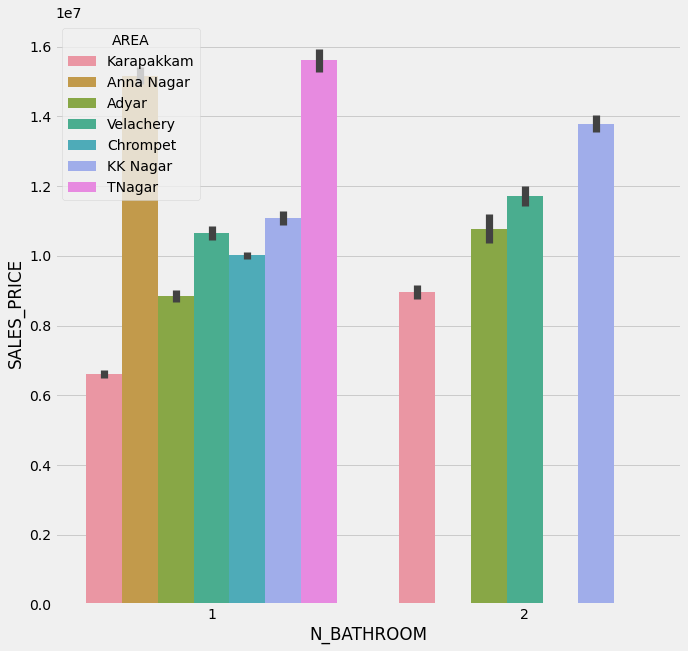

In [204]:
# N_BATHROOM,AREA,SALES_PRICE
plt.figure(figsize=(10,10))
sns.barplot(x=data_set["N_BATHROOM"],y=data_set["SALES_PRICE"],hue=data_set["AREA"])

OBSERVATION FOR BUYER:
If you are looking for 2 Bathrooms you have to look for area like Karapakkam, Annanagar,Velachery,KK Nagar

**INT_SQFT**

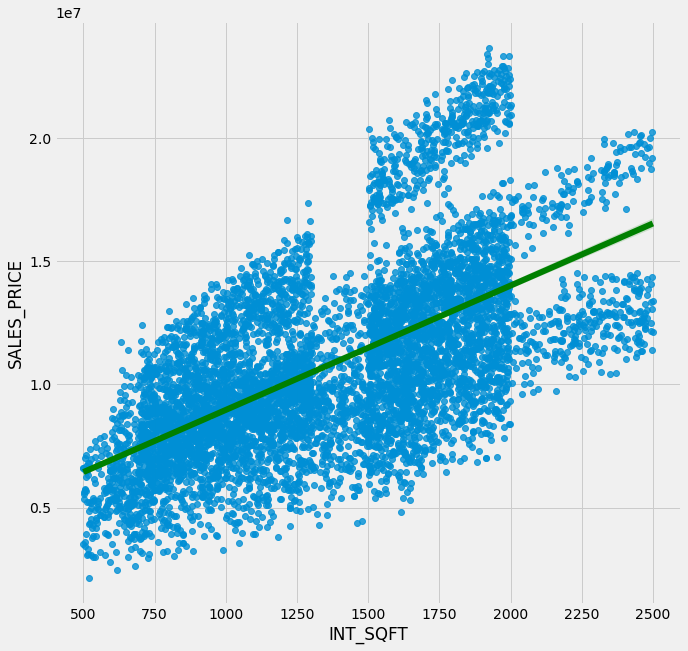

In [205]:
plt.figure(figsize=(10,10))
sns.regplot(x=data_set.INT_SQFT,y=data_set.SALES_PRICE,line_kws={"color":"green"})

There is a linear relationship between INT_SQFT and SALES_PRICE.So feature is selected.

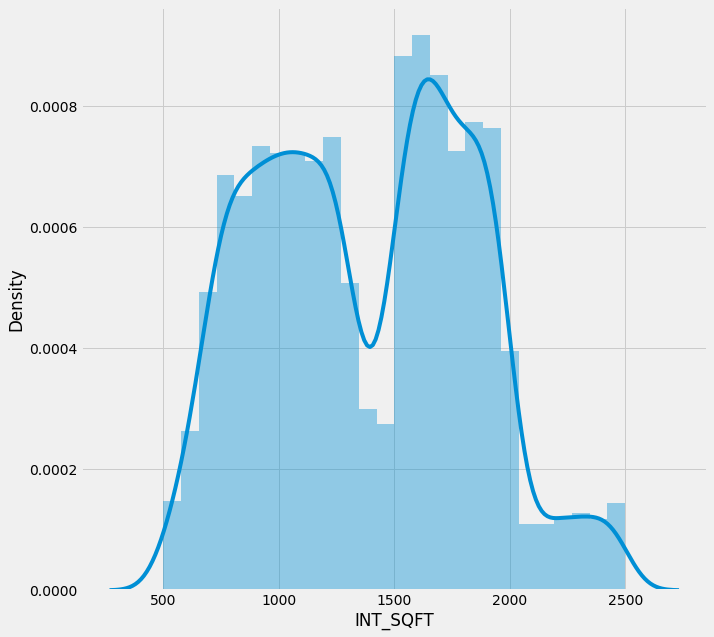

In [206]:
# INT_SQFT distribution 
plt.figure(figsize=(10,10))
sns.distplot(data_set.INT_SQFT)

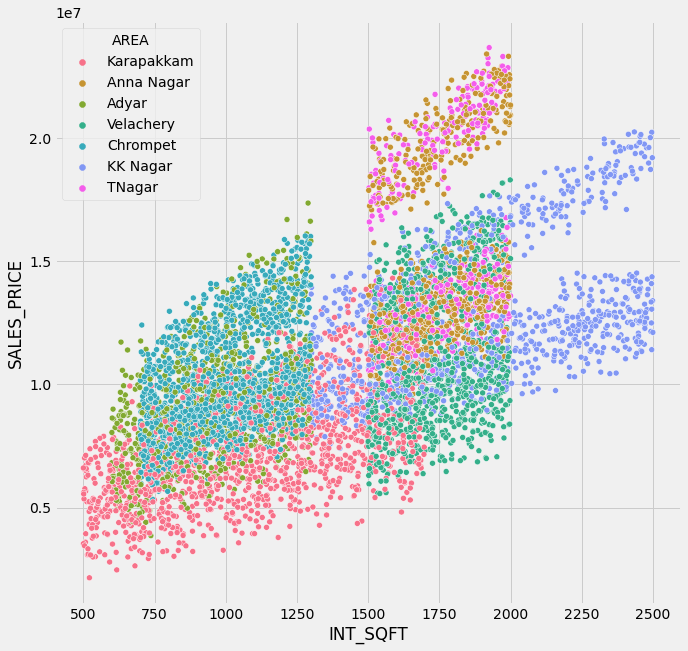

In [207]:
# INT_SQFT, AREA and SALES_PRICE
plt.figure(figsize=(10,10))
sns.scatterplot(x=data_set.INT_SQFT,y=data_set.SALES_PRICE,hue=data_set.AREA,markers="o")

1. Cheapest property is in Karapakkam and Costliest property in TNagar.
2. Costliest properties are sold in Annanagar and TNagar.
3. Properties > 2000 Sqft can be found in KKNagar.
4. Properties ~ 1250 Sqft can be found in Velachery,
5. Properties 1500-2000 Sqft can be found in Annanagar,TNagar and Chrompet.

**DIST_MAINROAD**

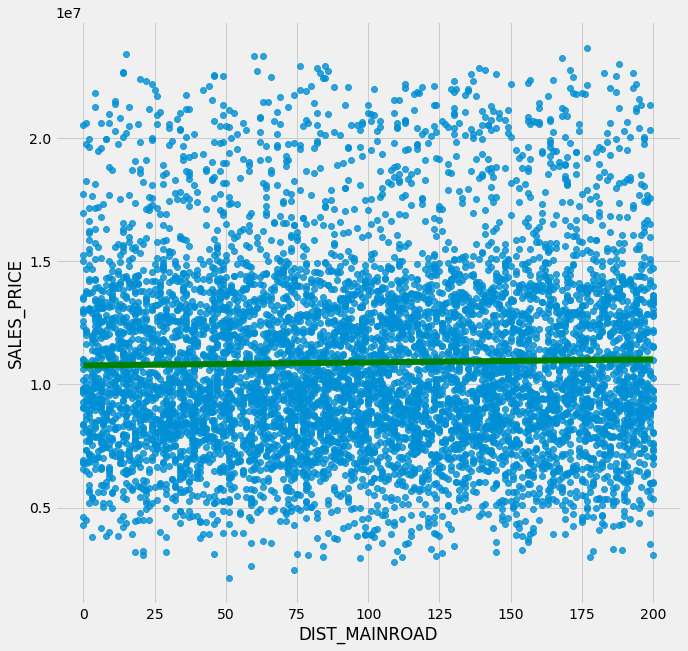

In [208]:
# DIST_MAINROAD VS SALES_PRICE
plt.figure(figsize=(10,10))
sns.regplot(x=data_set["DIST_MAINROAD"],y=data_set["SALES_PRICE"],line_kws={"color":"green"})
# correlation value is 0.018783 and graph shows no linear relationship . Feature DIST_MAINROAD is rejected.

**QS_BATHROOM**

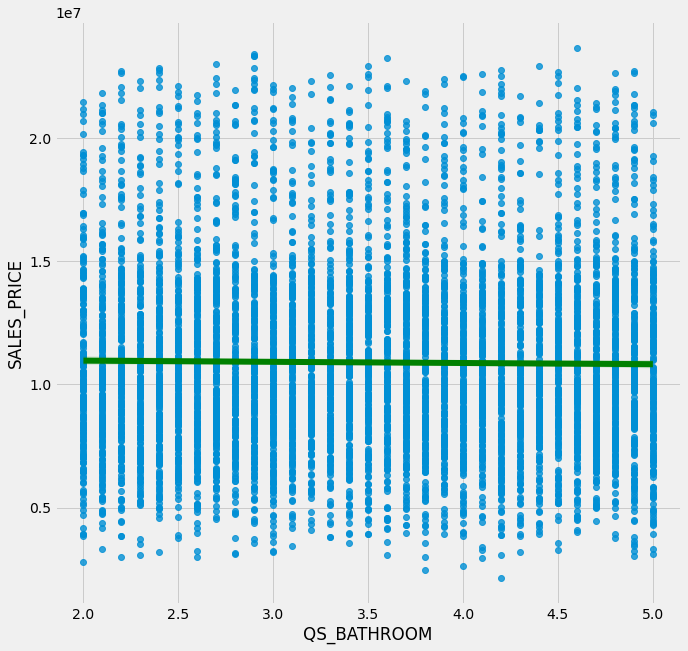

In [209]:
# QS_BATHROOM VS SALES_PRICE
plt.figure(figsize=(10,10))
sns.regplot(x=data_set["QS_BATHROOM"],y=data_set["SALES_PRICE"],line_kws={"color":"green"})
# correlation value is -0.011377 and graph shows no linear relationship . Feature QS_BATHROOM is rejected.

**QS_OVERALL**

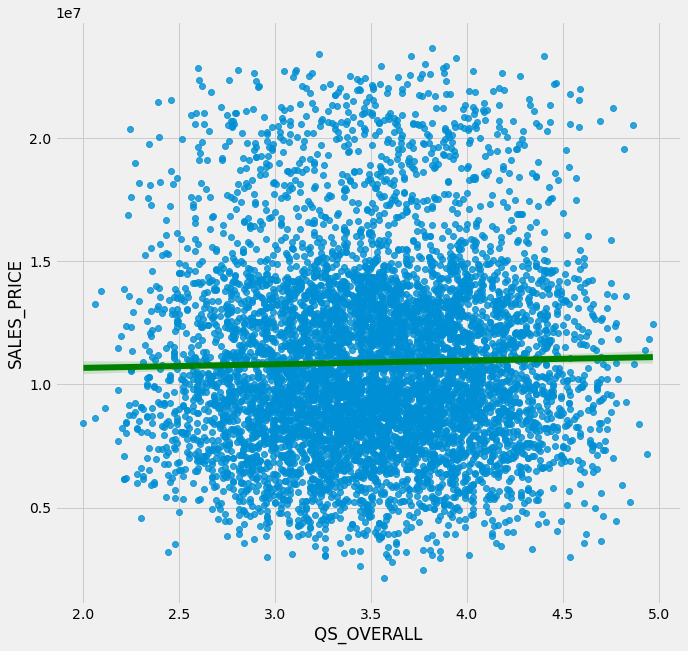

In [210]:
# QS_OVERALL VS SALES_PRICE
plt.figure(figsize=(10,10))
sns.regplot(x=data_set["QS_OVERALL"],y=data_set["SALES_PRICE"],line_kws={"color":"green"})
# correlation value is 0.020485 and graph shows no linear relationship . Feature QS_OVERALL is rejected.

**REG_FEE**

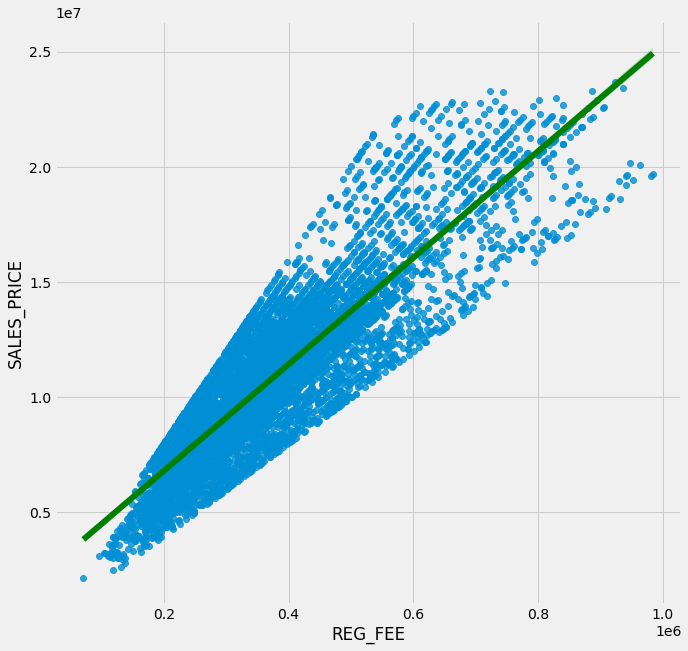

In [211]:
# REG_FEE VS SALES_PRICE
plt.figure(figsize=(10,10))
sns.regplot(x=data_set["REG_FEE"],y=data_set["SALES_PRICE"],line_kws={"color":"green"})
# correlation value is 0.878148 and graph shows a good linear relationship . 
# In general registeration fee is applied on top of SALES_PRICE.
# REG_FEE is an outcome from SALES_PRICE and not the other way around, so REG_FEE Feature is rejected.

**COMMIS**

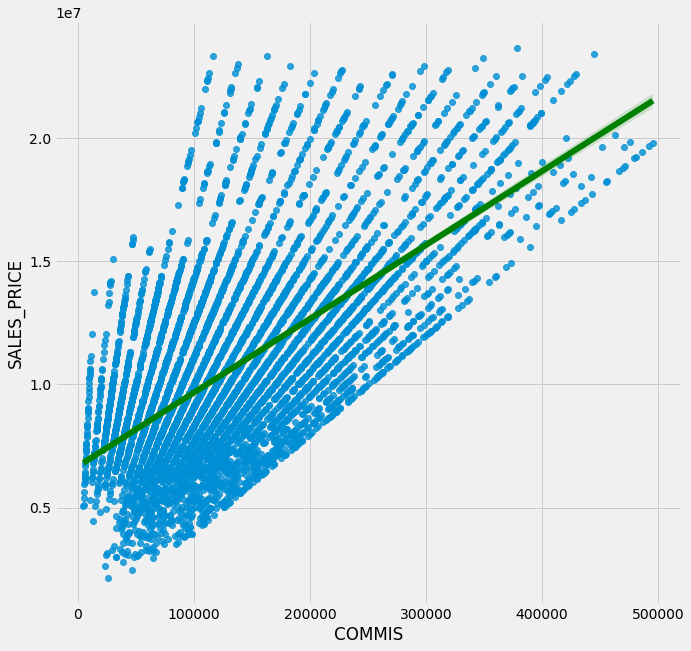

In [212]:
# COMMIS VS SALES_PRICE
plt.figure(figsize=(10,10))
sns.regplot(x=data_set["COMMIS"],y=data_set["SALES_PRICE"],line_kws={"color":"green"})
# correlation value is 0.626275 and graph shows a good linear relationship . 
# In general Commission is normally a % applied on SALES_PRICE.
# COMMIS is an outcome from SALES_PRICE and not the other way around, so COMMIS Feature is rejected.

**AGE**

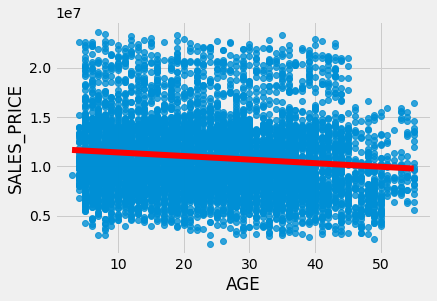

In [213]:
sns.regplot(x=data_set.AGE,y=data_set.SALES_PRICE,line_kws={"color":"red"})

There is a inverse linear relationship between AGE and SALES_PRICE . This is inline with the general bias that as age of house increases ,price reduces. The Feature AGE is selected.

# FEATURE SELECTION & ENCODING
EDA is done and now features with linear relationship are selected and encoded.
Features selected for encoding are PARK_FACIL,STREET,BUILDTYPE,UTILITY_AVAIL,MZZONE,AREA.

FEATURES SELECTED ARE: AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,STREET,MZZONE,UTILITY_AVAIL,AGE,BUILDTYPE.(11)

In [214]:
data_set["PARK_FACIL"]=data_set["PARK_FACIL"].map({"No":0,"Yes":1})

In [215]:
data_set["STREET"]=data_set["STREET"].map({"No Access":0,"Paved":1,"Gravel":2})

In [216]:
# Since there is a sudden jumpin the last one we will use one hot encoding.
data_set=pd.get_dummies(data=data_set,columns=["BUILDTYPE"])

In [217]:
data_set["UTILITY_AVAIL"]=data_set["UTILITY_AVAIL"].map({"ELO":0,"NoSeWa":1,"AllPub":2})

In [218]:
data_set["MZZONE"]=data_set["MZZONE"].map({'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6})

In [219]:
data_set["AREA"]=data_set["AREA"].map({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'TNagar':6})

In [220]:
data_set.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

# SPLIT AND SCALING

In [221]:
# Assigning feature and Target
x=data_set[["AREA","INT_SQFT","N_BEDROOM","N_BATHROOM","N_ROOM","PARK_FACIL","UTILITY_AVAIL","STREET","MZZONE","AGE",'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others']]
y=data_set["SALES_PRICE"]

In [222]:
# Spliting data as training and testing data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [223]:
#Scaling the data 
Scaling=StandardScaler()
x_train=Scaling.fit_transform(x_train)
x_test=Scaling.transform(x_test)

# **MODEL**

# Linear Regression

In [224]:
linear_regression=LinearRegression()
linear_regression.fit(x_train,y_train)

LinearRegression()

In [225]:
y_prediction=linear_regression.predict(x_test)

In [226]:
# Metrics
r2_score(y_test,y_prediction)

0.9193118636705708

# KNN Regression

In [227]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn_regression_check=KNeighborsRegressor(n_neighbors=i)
  knn_regression_check.fit(x_train,y_train)
  print("Value of n_neighbors:",i,"Train Score:",knn_regression_check.score(x_train,y_train),"Cross Validation score:",np.mean(cross_val_score(knn_regression_check,x_train,y_train,cv=10)))


Value of n_neighbors: 1 Train Score: 0.9999969967700454 Cross Validation score: 0.9384758834564855
Value of n_neighbors: 2 Train Score: 0.9848849589412362 Cross Validation score: 0.9487518592121035
Value of n_neighbors: 3 Train Score: 0.9779511300730308 Cross Validation score: 0.9518378996621729
Value of n_neighbors: 4 Train Score: 0.9737753323889662 Cross Validation score: 0.9533353534375936
Value of n_neighbors: 5 Train Score: 0.9710665277798802 Cross Validation score: 0.9527995682298757
Value of n_neighbors: 6 Train Score: 0.9685950335595485 Cross Validation score: 0.9515483631283234
Value of n_neighbors: 7 Train Score: 0.9660567519184972 Cross Validation score: 0.951055086915682
Value of n_neighbors: 8 Train Score: 0.9640759657303116 Cross Validation score: 0.9502447079819776
Value of n_neighbors: 9 Train Score: 0.9624680158988159 Cross Validation score: 0.9497539044356023
Value of n_neighbors: 10 Train Score: 0.9609727198094832 Cross Validation score: 0.948683896479509
Value of n_

In [228]:
# KNN Value of 5 is chosen
knn_regression=KNeighborsRegressor(n_neighbors=5)
knn_regression.fit(x_train,y_train)

KNeighborsRegressor()

In [229]:
knn_regression.score(x_test,y_test)

0.9528629437656644

# Decision Tree

In [230]:
decision_tree=DecisionTreeRegressor()
decision_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [231]:
y_prediction_dt=decision_tree.predict(x_test)

In [232]:
r2_score(y_test,y_prediction_dt)

0.9757870057167992

# Randon Forest 

In [233]:
random_forest=RandomForestRegressor()
random_forest.fit(x_train,y_train)

RandomForestRegressor()

In [234]:
y_prediction_rf=random_forest.predict(x_test)

In [235]:
r2_score(y_test,y_prediction_rf)

0.9891468154978753

# Bagging

In [236]:
bag = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100)
bag.fit(x_train, y_train)


BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100)

In [237]:
bag.score(x_test,y_test)

0.9894176802729787

# XG Boosting 

In [238]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  xg = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  xg.fit(x_train,y_train)
  print("Learning rate : ", lr, " Train score : ", xg.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(xg, x_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.3903027400721668  Cross-Val score :  -0.3994793987192181
Learning rate :  0.02  Train score :  0.7445882565509987  Cross-Val score :  0.7408391434564829
Learning rate :  0.03  Train score :  0.9240105199684359  Cross-Val score :  0.9214017920526455
Learning rate :  0.04  Train score :  0.9617802887795466  Cross-Val score :  0.9596300073843615
Learning rate :  0.05  Train score :  0.9740741234849368  Cross-Val score :  0.9718249448793413
Learning rate :  0.06  Train score :  0.979759353839882  Cross-Val score :  0.9779732684079068
Learning rate :  0.07  Train score :  0.9838559643366118  Cross-Val score :  0.9820087920692291
Learning rate :  0.08  Train score :  0.9868483592366898  Cross-Val score :  0.9849042870014504
Learning rate :  0.09  Train score :  0.9883049419031227  Cross-Val score :  0.9871315108744841
Learning rate :  0.1  Train score :  0.9905937648615195  Cross-Val score :  0.9888056019108221
Learning rate :  0.11  Train score :  0.

In [239]:
xg=xgb.XGBRegressor(learning_rate=0.7,n_estimators=100)
xg.fit(x_train,y_train)
xg.score(x_test,y_test)

[06:31:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9941347164121607

**XG BOOST has the highest score of 0.994, so this model is chosen for our project Chennai House Price prediction**